### **Course Roadmap: Building the Tiny Computer**

*   **Chapter 1: The Raw Materials (Bits, Integers, & Logic)**
    *   *Topics:* Binary, Hexadecimal, Two’s Complement, Bitwise Operators (`&`, `|`, `^`, `<<`), Integer Representation.
    *   *Source Material:* Lab 2, HW 1, "Bits and Beyond" Reading.
*   **Chapter 2: Digital Logic (The Wiring)**
    *   *Topics:* Transistors, Logic Gates (AND, OR, NOT, XOR), Multiplexers (Mux), Adders.
    *   *Source Material:* Lab 3, HW 2, "Circuits" Reading.
*   **Chapter 3: The Processor Architecture (The Toy ISA)**
    *   *Topics:* The Von Neumann Model, Registers, PC (Program Counter), Instruction Encoding, Fetch-Decode-Execute.
    *   *Source Material:* Lab 4, HW 3, "Designing a Processor" Reading.
*   **Chapter 4: Speaking the Machine's Language (Assembly)**
    *   *Topics:* x86-64 Assembly Syntax (AT&T), Registers (`%rax`, `%rdi`), Mov, Math, and Control Flow (Jumps).
    *   *Source Material:* Lab 6, HW 5, "x86-64 Summary" Reading.
*   **Chapter 5: Procedures & The Stack**
    *   *Topics:* The Stack Pointer (`%rsp`), `push`/`pop`, Calling Conventions, Stack Frames, Recursion in Assembly.
    *   *Source Material:* Lab 5, HW 4, "Calling Conventions" Reading.
*   **Chapter 6: C – The High-Level Assembler**
    *   *Topics:* C Syntax for JS Programmers, Types, Arrays vs. Pointers, Pointer Arithmetic.
    *   *Source Material:* Lab 7/8, HW 7, "C Reference" Reading.
*   **Chapter 7: Memory Organization & The Heap**
    *   *Topics:* `malloc`, `free`, Memory Leaks, Structs, The Heap vs. The Stack.
    *   *Source Material:* Lab 10, HW 8, "Memory Overview" Reading.
*   **Chapter 8: Data Representation (Beyond Integers)**
    *   *Topics:* Floating Point (IEEE 754), Characters/Strings, Arrays in Memory, Endianness.
    *   *Source Material:* Lab 11, "Floating Point" Reading.
*   **Chapter 9: Talking to the World (System I/O)**
    *   *Topics:* Unix File Descriptors, `read`/`write`, Buffering, Signals.
    *   *Source Material:* Lab 9/12, HW 10, "System Calls" Reading.
*   **Chapter 10: Security & Optimization**
    *   *Topics:* Buffer Overflows, Stack Smashing, Caching, Pipelining.
    *   *Source Material:* HW 6 (Enigma), "Vulnerabilities" Reading.

---

***

# Chapter 1: The Raw Materials (Bits, Integers, & Logic)

Before we can build our "Tiny Computer," we need to define what flows through its wires. In JavaScript, you see numbers like `42` or `-10`. In Systems, these are just illusions. The machine only sees **Voltage (High/Low)**, which we translate to **1 and 0**.

### 1. Intuition First
**The Odometer Analogy**
Imagine an old car odometer that only has 3 digits. It reads `000`.
If you drive forward 1 mile, it reads `001`.
If you drive *backward* 1 mile from `000`, it rolls over to `999`.

In a computer, we have a fixed number of bits (usually 8, 16, 32, or 64).
If you have 8 bits and the value `00000000`, and you subtract 1, the computer "rolls over" backwards to `11111111`.
*   **Crucial Insight:** To a computer, a massive positive number (like `11111111` or 255) looks identical to `-1`. It is *us* (the programmers) who decide how to interpret it.

### 2. Formal Definition (Translated)
*   **Bit:** A single 0 or 1.
*   **Byte:** A group of 8 bits. This is the smallest "addressable" unit of memory.
*   **Hexadecimal (Hex):** A shorthand for binary. One Hex digit (0-9, A-F) represents exactly **4 bits**.
    *   `0x` is the prefix used in code to denote Hex.
    *   Example: `0xF` = `1111` (binary) = `15` (decimal).
*   **Two's Complement:** The standard way computers represent integers so that addition and subtraction work for both positive and negative numbers.
    *   **Rule:** To make a number negative: **Flip all bits and add 1.**

### 3. Diagrams & Relationships

Let's visualize how Hex, Binary, and Decimal relate, and how Two's Complement works on a tiny 4-bit system.

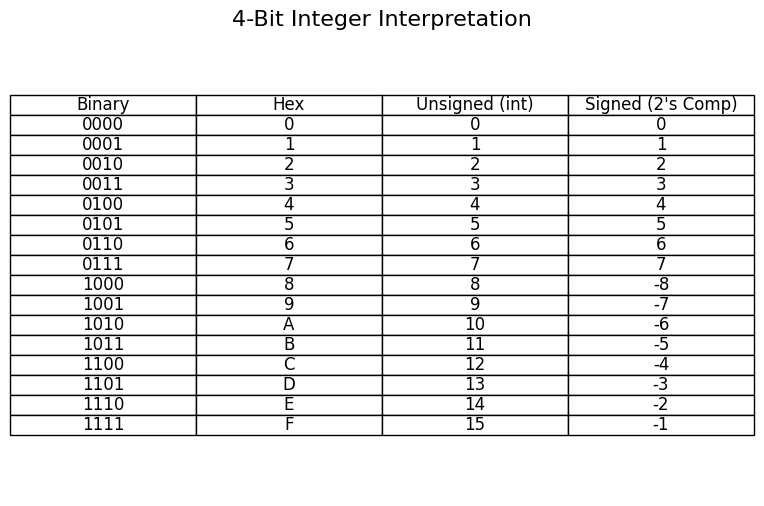

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a lookup table for 4-bit integers (Unsigned vs Signed)
data = []
for i in range(16):
    binary_str = format(i, '04b')
    hex_str = format(i, 'X')
    unsigned_val = i
    # Calculate Two's Complement for 4 bits
    if i < 8:
        signed_val = i
    else:
        signed_val = i - 16 # Wrap around for negative
    
    data.append([binary_str, hex_str, unsigned_val, signed_val])

df = pd.DataFrame(data, columns=["Binary", "Hex", "Unsigned (int)", "Signed (2's Comp)"])

# Plotting simply as a table
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.title("4-Bit Integer Interpretation", fontsize=16)
plt.show()

### 4. Key Takeaways
*   **1 Hex Digit = 4 Bits.** (e.g., `0xA` is `1010`).
*   **2 Hex Digits = 1 Byte.** (e.g., `0xFF` is `11111111`).
*   **Two's Complement Shortcut:** If the first bit (Most Significant Bit, or MSB) is `1`, the number is negative.
*   **Bitwise Operators:**
    *   `&` (AND): Keeps 1s only if both inputs are 1. (Used to "mask" or extract bits).
    *   `|` (OR): Keeps 1s if either input is 1. (Used to "set" bits).
    *   `^` (XOR): Keeps 1s if inputs are different. (Used to toggle bits).
    *   `~` (NOT): Flips 0 to 1 and 1 to 0.

### 5. Worked Example: Two's Complement
**Task:** Find the decimal value of the 8-bit hex number `0xFF` if we treat it as a **signed** integer.

1.  **Convert Hex to Binary:**
    `F` is `15`, which is `8 + 4 + 2 + 1` → `1111`.
    So `0xFF` is `1111 1111`.

2.  **Check the Sign:**
    The first bit is `1`. This means it is a negative number.

3.  **Apply Two's Complement to find the magnitude:**
    *   Start: `1111 1111`
    *   Flip bits: `0000 0000`
    *   Add 1: `0000 0001` (This is 1).

4.  **Result:**
    Since the sign was negative, the value is **-1**.

### 6. Practice Problems
*Try these on paper or in your head before looking at the hints.*

**Problem 1 (Hex Conversion):**
Convert the binary sequence `1010 0101` to Hexadecimal.

**Problem 2 (Bitwise Logic):**
In JavaScript, you can do `x & y`. What is the result (in Hex) of `0x5 & 0x3`?
*Hint: Convert to 4-bit binary first.*

**Problem 3 (Signed Integers):**
You have a 4-bit system. What is the decimal value of binary `1000` if it is a **signed** number?

**Problem 4 (Bit Shifting):**
Compute `0x01 << 2`. Give the result in Hex.

---

### 7. Hints

*   **Hint 1:** Split the 8 bits into two groups of 4. `1010` is 8+2=10. `0101` is 4+1=5. What is "10" in Hex?
*   **Hint 2:** `0x5` is `0101`. `0x3` is `0011`. Stack them and look for columns where *both* are 1.
*   **Hint 3:** The first bit is 1, so it's negative. Flip `1000` to `0111` and add 1. That gives you the magnitude.
*   **Hint 4:** `0x01` is `0001`. Move the `1` two spots to the left. What is `0100` in decimal/hex?

---

### 8. Intuitive Solutions

**Solution 1:**
*   `1010` = 10. In Hex, 10 is `A`.
*   `0101` = 5. In Hex, 5 is `5`.
*   Result: **0xA5**.

**Solution 2:**
*   `0x5` = `0101`
*   `0x3` = `0011`
*   `AND` = `0001` (Only the last bit matches).
*   Result: **0x1**.

**Solution 3:**
*   `1000` starts with 1, so it's negative.
*   Flip bits: `0111`.
*   Add 1: `0111` + `1` = `1000` (which is 8).
*   Result: **-8**. (This is a weird edge case in Two's Complement called the "most negative number").

**Solution 4:**
*   `0x01` is `0001`.
*   Shift left 2: `0100`.
*   `0100` is 4.
*   Result: **0x04**.

---

### 9. Reference Summary (Cheat Sheet)

| Concept | Symbol / Rule | Description |
| :--- | :--- | :--- |
| **Hex Digit** | `0`-`9`, `A`-`F` | Represents 4 bits (nibble). `F` is `1111`. |
| **Byte** | 8 bits | The standard unit of memory. Max value 255 (unsigned) or 127 (signed). |
| **MSB** | Most Significant Bit | The bit on the far left. In signed numbers, `1` = negative. |
| **Two's Comp** | `~x + 1` | The math trick to negate a number in binary. |
| **AND** | `&` | "Intersection". Result is 1 only if both inputs are 1. |
| **OR** | `\|` | "Union". Result is 1 if *any* input is 1. |
| **XOR** | `^` | "Difference". Result is 1 if inputs are *different*. |
| **Left Shift** | `<< n` | Multiplies by $2^n$. |
| **Right Shift** | `>> n` | Divides by $2^n$. |

# Chapter 2: Digital Logic (The Wiring)

We have defined our raw materials (0s and 1s). Now we need to build the machinery to manipulate them.

In JavaScript, if you want to add two numbers, you write `a + b`.
In Systems, **there is no magic `+` symbol.** We have to build a physical structure out of metal and silicon that forces electricity to behave like addition.

This chapter turns **Logic** into **Physics**.

### 1. Intuition First
**The Plumbing Analogy**
Think of electricity like water flowing through pipes.
*   **Wire:** A pipe.
*   **Voltage (1):** High water pressure.
*   **Ground (0):** No pressure (empty pipe).
*   **Transistor:** A valve or faucet.

In a computer, we don't have human hands to turn the valves. We use **water pressure** (voltage) from one pipe to push open the valve on another pipe.
*   **Input 1** turns on the valve.
*   **Input 0** turns off the valve.

By arranging these valves (transistors) in clever ways, we create **Gates**.

### 2. Formal Definition (Translated)
*   **Transistor:** An electrically controlled switch. The fundamental building block of modern computers.
*   **Logic Gate:** A tiny circuit made of transistors that performs a single logical operation (like AND, OR, NOT).
*   **Multiplexer (Mux):** A hardware "choice" operator. It selects one input signal to pass through based on a "selector" signal.
    *   *JS equivalent:* The ternary operator `cond ? a : b`.
*   **Full Adder:** A circuit that adds three bits (Bit A, Bit B, and a Carry-In) and produces a Sum and a Carry-Out.

### 3. Diagrams & Relationships

Let's look at the three most critical components we need to build our Tiny Computer: The **AND** gate, the **XOR** gate, and the **MUX**.

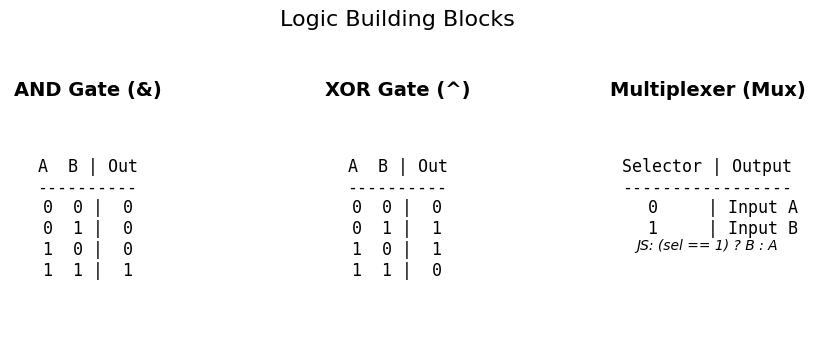

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')

# 1. AND Gate Table
ax.text(0.1, 0.8, "AND Gate (&)", fontsize=14, ha='center', weight='bold')
ax.text(0.1, 0.6, "A  B | Out\n----------\n0  0 |  0\n0  1 |  0\n1  0 |  0\n1  1 |  1", 
        fontsize=12, family='monospace', ha='center', va='top')

# 2. XOR Gate Table
ax.text(0.5, 0.8, "XOR Gate (^)", fontsize=14, ha='center', weight='bold')
ax.text(0.5, 0.6, "A  B | Out\n----------\n0  0 |  0\n0  1 |  1\n1  0 |  1\n1  1 |  0", 
        fontsize=12, family='monospace', ha='center', va='top')

# 3. MUX Logic (The Hardware "If")
ax.text(0.9, 0.8, "Multiplexer (Mux)", fontsize=14, ha='center', weight='bold')
ax.text(0.9, 0.6, "Selector | Output\n-----------------\n   0     | Input A\n   1     | Input B", 
        fontsize=12, family='monospace', ha='center', va='top')
ax.text(0.9, 0.3, "JS: (sel == 1) ? B : A", fontsize=10, style='italic', ha='center')

plt.title("Logic Building Blocks", fontsize=16)
plt.show()

### 4. Key Takeaways
*   **Logic Gates are Physical:** An `AND` gate isn't an abstract concept; it's a specific arrangement of wiring that only lets current through if both input wires have pressure.
*   **The Mux is Critical:** A **Multiplexer (Mux)** allows the computer to make decisions. It connects multiple inputs to one output and lets a "selector" wire choose which one gets through.
*   **The Ripple Carry Adder:** To add big numbers (like 8-bit integers), we chain 1-bit adders together. The "Carry Out" of the first adder becomes the "Carry In" of the next.
    *   *Analogy:* Like doing math on paper. You carry the 1 to the next column.

### 5. Worked Example: The 1-Bit Adder
**Task:** Build a circuit that adds two 1-bit numbers, `A` and `B`. It needs two outputs: the **Sum** (1s place) and the **Carry** (2s place).

**Step 1: Truth Table Logic**
Let's see what happens when we add bits:
*   0 + 0 = 0 (Sum 0, Carry 0)
*   0 + 1 = 1 (Sum 1, Carry 0)
*   1 + 0 = 1 (Sum 1, Carry 0)
*   1 + 1 = 2 (Binary `10` -> Sum 0, Carry 1)

**Step 2: Match to Gates**
Look at the **Sum** column: `0, 1, 1, 0`.
*   That looks exactly like an **XOR** gate (1 if inputs are different).
    *   `Sum = A ^ B`

Look at the **Carry** column: `0, 0, 0, 1`.
*   That looks exactly like an **AND** gate (1 only if both are 1).
    *   `Carry = A & B`

**Step 3: The Circuit**
To build a 1-bit adder, you just wire inputs A and B into an XOR gate (for the Sum) and an AND gate (for the Carry).

### 6. Practice Problems

**Problem 1 (Logic Gates):**
You have two inputs, `A = 1` and `B = 0`.
What is the output of the following circuit expression?
`Result = (A AND B) OR (A XOR B)`

**Problem 2 (The Mux):**
You have a Mux with two inputs:
*   Input 0: The value `0x55`
*   Input 1: The value `0xFF`
*   Selector: `1`
What is the output?

**Problem 3 (Ripple Carry Addition):**
We are adding two 4-bit binary numbers: `0101` (5) and `0011` (3) using a ripple carry adder.
The adder processes from right to left (least significant bit first).
*   Bit 0: `1 + 1` = ? (Sum: ?, Carry: ?)
*   Bit 1: `0 + 1 + (Carry from Bit 0)` = ?
*   What is the final 4-bit result?

**Problem 4 (Hardware "If"):**
Write a C/JavaScript expression using the ternary operator (`? :`) that represents a 2-input Mux where:
*   `s` is the selector (0 or 1).
*   `x` is Input 1 (selected when s is 1).
*   `y` is Input 0 (selected when s is 0).

---

### 7. Hints

*   **Hint 1:** Evaluate the parentheses first. `1 AND 0` is...? `1 XOR 0` is...? Then OR them together.
*   **Hint 2:** A Mux is just a switch. If the selector is 1, it connects the wire from Input 1 to the output.
*   **Hint 3:** Remember binary addition rules: `1+1 = 10` (0 carry 1). `1+1+1 = 11` (1 carry 1).
*   **Hint 4:** In logic, `1` usually means "True" and `0` means "False".

---

### 8. Intuitive Solutions

**Solution 1:**
*   `A AND B` = `1 & 0` = `0`.
*   `A XOR B` = `1 ^ 0` = `1`.
*   `0 OR 1` = `1`.
*   **Result: 1**.

**Solution 2:**
*   The selector is `1`.
*   Therefore, the Mux chooses **Input 1**.
*   **Result: 0xFF**.

**Solution 3:**
*   **Bit 0 (Rightmost):** `1 + 1`. Sum = `0`, Carry = `1`.
*   **Bit 1:** `0 + 1 + 1` (Carry). Sum = `0`, Carry = `1`.
*   **Bit 2:** `1 + 0 + 1` (Carry). Sum = `0`, Carry = `1`.
*   **Bit 3:** `0 + 0 + 1` (Carry). Sum = `1`, Carry = `0`.
*   **Result:** `1000` (which is decimal 8). Correct, because 5 + 3 = 8.

**Solution 4:**
*   `result = (s == 1) ? x : y;`
*   *(Note: In hardware design, we often say logic 1 is "True" and logic 0 is "False")*

---

### 9. Reference Summary (Cheat Sheet)

| Component | Symbol | Logic / Code Equiv | Description |
| :--- | :--- | :--- | :--- |
| **Transistor** | | Switch | Tiny electrical switch controlled by voltage. |
| **AND Gate** | `D`-shape | `a & b` | Output 1 only if **both** inputs are 1. |
| **OR Gate** | `)`-shape | `a \| b` | Output 1 if **either** input is 1. |
| **NOT Gate** | Triangle+Bubble | `~a` or `!a` | Inverts the input (1→0, 0→1). |
| **XOR Gate** | `))` -shape | `a ^ b` | Output 1 if inputs are **different**. |
| **Mux** | Trapezoid | `s ? a : b` | Selects one input to pass through based on selector `s`. |
| **Ripple Carry** | Block diagram | `a + b` | A chain of adders. Carries "ripple" from right (LSB) to left (MSB). |

---

### 10. Associated Problems (from your PDFs)

**Lab 3 & HW 2 Concept Application**
Your PDFs (Lab 3 and HW 2) ask you to design specific variants of adders.
*   **Concept:** A "4-bit +2 incrementer".
*   **Translation:** You want to calculate `x + 2`.
*   **How to solve:** In binary, `2` is `0010`.
    *   This is just a standard adder where one input is variable `x` and the other input is fixed to `0010`.
    *   You can simplify the logic! You know bit 0 of the second number is `0`, bit 1 is `1`, etc. You can hardwire those inputs.

**HW 2 "Double Adder":**
*   **Problem:** Calculate `z = x + x + y`.
*   **Hint:** `x + x` is the same as `x * 2`.
*   **Binary Trick:** Multiplying by 2 is just **shifting left by 1** (e.g., `0011` (3) << 1 becomes `0110` (6)).
*   **Solution Strategy:** Instead of building two separate adders, just shift the wires for `x` to the left by one position (effectively adding a 0 at the end) and *then* add `y` using one adder.

# Chapter 3: The Processor Architecture (The Toy ISA)

We have the raw materials (bits) and the tools (logic gates). Now we are going to build the brain.

In JavaScript, when you run `node myScript.js`, the computer reads your code line by line and does what you say. But physically, how does a chunk of silicon "read" and "do"?

We are going to build the **Tiny Computer Architecture**. This is the specific machine used in your Labs 4, 5, and Homeworks 3, 4.

### 1. Intuition First
**The Chef and the Recipe Card**

Imagine a very fast, very obedient, but very forgetful chef (The CPU).
*   **The Kitchen Counter (Registers):** The chef has a tiny amount of counter space right in front of them. They can only fit **4 bowls** here. This is where work happens *right now*.
*   **The Pantry (Memory):** A huge shelf of numbered slots (0-255). It takes time to walk to the pantry, so we only go there when we have to.
*   **The Recipe (Instructions):** A list of steps stored *in the pantry* alongside the food.
*   **The Finger (Program Counter / PC):** The chef keeps their finger on the current step of the recipe. After doing a step, they slide their finger down to the next one.

**The "Fetch-Decode-Execute" Loop**
The chef does this loop forever, billions of times a second:
1.  **Fetch:** Look at the pantry slot where the Finger (PC) is pointing. Read that number.
2.  **Decode:** "What does this number mean?" (e.g., `0x10` might mean "Add").
3.  **Execute:** Do the math using the bowls on the counter.
4.  **Repeat:** Move the Finger (PC) to the next slot.

### 2. Formal Definition (Translated)
*   **ISA (Instruction Set Architecture):** The vocabulary of the computer. The list of commands (opcodes) the CPU understands.
*   **PC (Program Counter):** A special register that holds the *memory address* of the next instruction to execute.
*   **Registers (`r0`, `r1`, `r2`, `r3`):** Extremely fast storage locations directly inside the CPU. Our Tiny Computer has 4 of them.
*   **Von Neumann Architecture:** The concept that **Code** (instructions) and **Data** (variables) are stored in the *same* memory.

### 3. The Tiny Computer Specs & Diagram

Our Tiny Computer instructions are exactly **1 Byte (8 bits)** long (usually).
We split that byte into three parts to understand it:

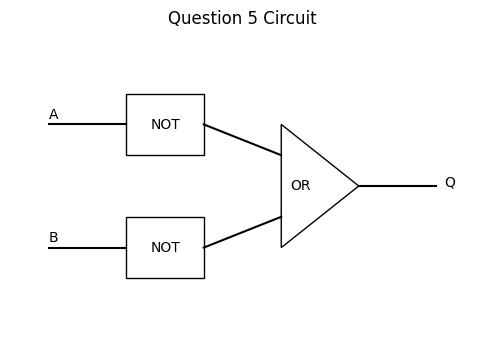

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_circuit():
    fig, ax = plt.subplots(figsize=(6, 4))
    
    # Draw logic gates (simplified boxes for rendering)
    # NOT A
    ax.add_patch(patches.Rectangle((2, 6), 2, 2, edgecolor='black', facecolor='white'))
    ax.text(3, 7, "NOT", ha='center', va='center')
    
    # NOT B
    ax.add_patch(patches.Rectangle((2, 2), 2, 2, edgecolor='black', facecolor='white'))
    ax.text(3, 3, "NOT", ha='center', va='center')
    
    # OR gate
    ax.add_patch(patches.PathPatch(patches.Path([(6, 3), (6, 7), (8, 5), (6, 3)]), edgecolor='black', facecolor='white'))
    ax.text(6.5, 5, "OR", ha='center', va='center')

    # Wires
    # Input A to NOT
    plt.plot([0, 2], [7, 7], 'k-') 
    ax.text(0, 7.2, "A")
    
    # Input B to NOT
    plt.plot([0, 2], [3, 3], 'k-')
    ax.text(0, 3.2, "B")
    
    # NOT A output to OR input
    plt.plot([4, 6], [7, 6], 'k-')
    
    # NOT B output to OR input
    plt.plot([4, 6], [3, 4], 'k-')
    
    # Output Q
    plt.plot([8, 10], [5, 5], 'k-')
    ax.text(10.2, 5, "Q")

    ax.set_xlim(-1, 11)
    ax.set_ylim(0, 10)
    plt.axis('off')
    plt.title("Question 5 Circuit")
    plt.show()

draw_circuit()

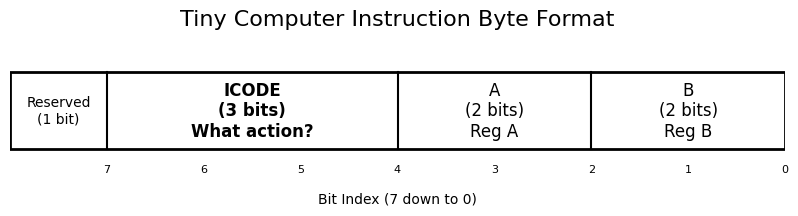

In [3]:
import matplotlib.pyplot as plt

def draw_instruction_format():
    fig, ax = plt.subplots(figsize=(10, 2))
    ax.set_xlim(0, 8)
    ax.set_ylim(0, 2)
    ax.axis('off')

    # Draw the byte box
    ax.add_patch(plt.Rectangle((0, 0.5), 8, 1, fill=None, edgecolor='black', lw=2))
    
    # Dividers
    ax.plot([1, 1], [0.5, 1.5], color='black') # Reserved bit
    ax.plot([4, 4], [0.5, 1.5], color='black') # icode split
    ax.plot([6, 6], [0.5, 1.5], color='black') # a / b split

    # Labels
    ax.text(0.5, 1.0, "Reserved\n(1 bit)", ha='center', va='center', fontsize=10)
    ax.text(2.5, 1.0, "ICODE\n(3 bits)\nWhat action?", ha='center', va='center', fontsize=12, weight='bold')
    ax.text(5, 1.0, "A\n(2 bits)\nReg A", ha='center', va='center', fontsize=12)
    ax.text(7, 1.0, "B\n(2 bits)\nReg B", ha='center', va='center', fontsize=12)
    
    # Bit indices
    for i in range(9):
        ax.text(8-i, 0.2, str(i) if i < 8 else "", ha='center', fontsize=8)
    ax.text(4, -0.2, "Bit Index (7 down to 0)", ha='center')

    plt.title("Tiny Computer Instruction Byte Format", fontsize=16)
    plt.show()

draw_instruction_format()

**Instruction Breakdown:**
*   **Bit 7 (Reserved):** Usually 0. If 1, it's a special extended instruction (like for functions).
*   **Bits 6-4 (ICODE):** The Operation Code. Tells the CPU *what* to do (Add, Move, etc.).
*   **Bits 3-2 (A):** The destination register index (0, 1, 2, or 3).
*   **Bits 1-0 (B):** The source register index (0, 1, 2, or 3).

### 4. The Instruction Table (Cheat Sheet)
*You will need this for every single homework assignment involving "Toy ISA".*

| ICODE (Binary) | ICODE (Hex) | Action | Translation |
| :--- | :--- | :--- | :--- |
| `000` | **0** | `rA = rB` | **Move:** Copy value from Reg B to Reg A. |
| `001` | **1** | `rA += rB` | **Add:** Add B to A, store result in A. |
| `010` | **2** | `rA &= rB` | **And:** Bitwise AND. |
| `011` | **3** | `rA = Mem[rB]` | **Load:** Go to memory address stored in B, read value into A. |
| `100` | **4** | `Mem[rB] = rA` | **Store:** Write value in A into memory at address B. |
| `101` | **5** | *Special* | **Op:** `~rA`, `-rA`, `!rA` (depends on B bits). |
| `110` | **6** | *Immediate* | **Math with Constants:** Uses the *next* byte as a raw number. |
| `111` | **7** | *Compare* | **Jump:** If `rA <= 0`, jump to address in `rB`. |

### 5. Worked Example: Decoding Hex
**Task:** You find the byte `0x16` in memory. What does the computer do?

**Step 1: Convert to Binary**
`0x1` = `0001`
`0x6` = `0110`
Total: `00010110`

**Step 2: Split according to the diagram**
*   **Reserved (Bit 7):** `0` (Standard instruction)
*   **ICODE (Bits 6-4):** `001`
*   **A (Bits 3-2):** `01`
*   **B (Bits 1-0):** `10`

**Step 3: Translate**
*   **ICODE `001`**: Look at the table. It is `rA += rB`.
*   **A `01`**: Register 1 (`r1`).
*   **B `10`**: Register 2 (`r2`).

**Result:**
`r1 = r1 + r2`
(Add the value in register 2 to register 1).

### 6. Practice Problems

**Problem 1 (Encoding):**
Write the Hex byte for the instruction: `r0 = r3`.
*Hint: Move is icode 0. A is 0. B is 3.*

**Problem 2 (Decoding):**
You see the byte `0x23` in memory.
1. Convert to binary.
2. Identify ICODE, A, and B.
3. What does it do?

**Problem 3 (Memory Operation):**
You want to write the value inside `r2` into the memory address stored in `r1`.
What Hex instruction is this?

**Problem 4 (Jumping):**
The instruction is `0x70`. What check is performed, and where does the computer jump if the check passes?

---

### 7. Hints

*   **Hint 1:** Icode is `000`. A is `00`. B is `11`. Put them together: `0 000 00 11`. Convert to Hex.
*   **Hint 2:** `2` is `0010`. `3` is `0011`. Icode is the first 3 bits after the zero.
*   **Hint 3:** "Writing" to memory is a **Store** operation. Check the table for "Store" (Write rA to Mem[rB]). `rA` is the data (`r2`), `rB` is the address (`r1`).
*   **Hint 4:** `0x7` is `0111`. Icode 7 is the Jump instruction. A and B are both 0. Check the table for ICODE 7 rules.

---

### 8. Intuitive Solutions

**Solution 1:**
*   Op: Move (`000`)
*   Dest A: `r0` (`00`)
*   Src B: `r3` (`11`)
*   Binary: `0 000 00 11` -> `0000 0011`
*   Hex: **0x03**

**Solution 2:**
*   Hex `0x23` -> Binary `0010 0011`.
*   Split: `0` (res) | `010` (icode) | `00` (A) | `11` (B).
*   Icode `010` is **AND**.
*   A is `r0`. B is `r3`.
*   Result: **r0 &= r3** (Logic AND r0 with r3).

**Solution 3:**
*   We want to **Write** to memory. Table says that is ICODE 4 (`100`).
*   `Write rA to Mem[rB]`.
*   Our value is in `r2`, so A = `10` (2).
*   Our address is in `r1`, so B = `01` (1).
*   Binary: `0 100 10 01` -> `0100 1001`
*   Hex: **0x49**

**Solution 4:**
*   `0x70` -> `0111 0000`.
*   Icode is `111` (7). A=`0`, B=`0`.
*   Rule for ICODE 7: "Compare `rA` to 0. If `rA <= 0`, set `PC = rB`".
*   Here, `rA` is `r0` and `rB` is `r0`.
*   Result: **If `r0 <= 0`, jump to address stored in `r0`.**

---

### 9. Reference Summary (Cheat Sheet)

| Variable | Definition |
| :--- | :--- |
| **PC** | **Program Counter**. The memory address of the *current* instruction. Increases by 1 after every step (unless we Jump). |
| **IR** | **Instruction Register**. Holds the current byte we are decoding. |
| **Register File** | The array `[r0, r1, r2, r3]`. Fastest storage. |
| **ICODE** | Bits 4-6. Determines the operation (Add, Mov, Load, Store). |
| **A / B** | Bits 2-3 / 0-1. The registers used as operands. |
| **Fetch** | `IR = Mem[PC]` (Get the byte). |
| **Decode** | Split the byte into `icode`, `a`, `b`. |
| **Execute** | Perform the math or memory access. |

### 10. Associated Problems (Course-Specific)

**Lab 4 Simulator Logic**
In Lab 4, you write the software that *is* the CPU.
*   You will write a loop: `while (running) { ... }`
*   Inside:
    1.  `instruction = memory[pc]`
    2.  `icode = (instruction >> 4) & 0x7` (Extract bits using shifting/masking from Ch 1!)
    3.  `regA = (instruction >> 2) & 0x3`
    4.  `regB = instruction & 0x3`
    5.  `switch (icode) { case 1: regs[regA] += regs[regB]; break; ... }`
    6.  `pc++`

**HW 3 Binary Product**
You have to write a program *in hex* to multiply two numbers.
*   Since the Tiny ISA doesn't have a `Multiply` instruction, you have to write a loop using `Add`.
*   `x * y` is just adding `x` to itself `y` times.
*   You will use **ICODE 7 (Jump)** to repeat the loop until `y` reaches 0.

# Chapter 4: Speaking the Machine's Language (Assembly)

We have graduated from the "Tiny Computer" (our tricycle) to the **x86-64 Processor** (a Formula 1 Racecar).

In the previous chapter, we hand-coded bytes like `0x16`. Humans are bad at memorizing numbers. We need a human-readable language that maps 1-to-1 with those bytes. That language is **Assembly**.

Specifically, we will use **AT&T Syntax** (used by Linux/Unix/MacOS), which is the standard for this course.

### 1. Intuition First
**The "Mad Libs" of Computing**

Assembly is just filling in the blanks of a sentence structure.
In AT&T syntax, the sentence structure is almost always:
**"Do [ACTION] with [SOURCE], and put the result in [DESTINATION]."**

*   **Verbs (Opcodes):** `mov` (move), `add` (add), `sub` (subtract).
*   **Nouns (Operands):**
    *   **Registers:** The chef's counter space. Now we have 16 of them, and they have names like `%rax`, `%rbx`.
    *   **Immediates:** Raw numbers, like `$5` or `$100`.
    *   **Memory:** The pantry. We access it using specific syntax like `(%rax)`.

**The Golden Rule of AT&T Syntax:**
It is always **Source $\rightarrow$ Destination**.
`movq $5, %rax` means "Move the value 5 **into** register rax."

### 2. Formal Definition (Translated)
*   **Assembly Language:** A low-level programming language where there is a very strong correspondence between the program's statements and the architecture's machine code instructions.
*   **x86-64:** The 64-bit version of the instruction set used by almost all modern laptops and servers (Intel and AMD).
*   **Word Size:** The "native" size of data. On x86-64, a "Word" is historically 16 bits, but a "Quad Word" is 64 bits.
*   **Suffixes:** Instructions often end in a letter indicating size:
    *   `q` = Quad Word (64 bits) -> **The default for us.**
    *   `l` = Long Word (32 bits).
    *   `w` = Word (16 bits).
    *   `b` = Byte (8 bits).

### 3. Registers (The New Kitchen)

The Tiny Computer had `r0`-`r3`. x86-64 has 16 massive 64-bit registers. We can use the whole register, or just the bottom parts.

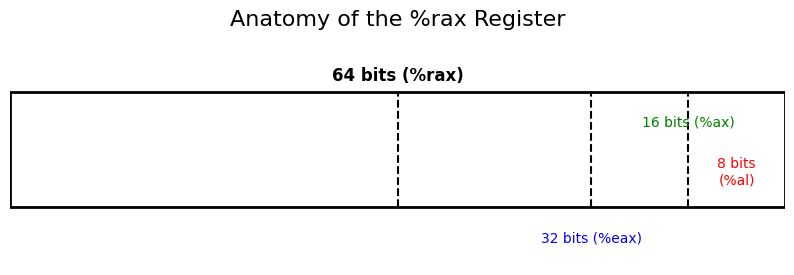

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(10, 3))
ax.set_xlim(0, 64)
ax.set_ylim(0, 2)
ax.axis('off')

# Draw the 64-bit register
rect = patches.Rectangle((0, 0.5), 64, 1, linewidth=2, edgecolor='black', facecolor='none')
ax.add_patch(rect)

# Draw sub-registers
ax.plot([32, 32], [0.5, 1.5], 'k--') # 32-bit line
ax.plot([48, 48], [0.5, 1.5], 'k--') # 16-bit line
ax.plot([56, 56], [0.5, 1.5], 'k--') # 8-bit line

# Labels
ax.text(32, 1.6, "64 bits (%rax)", ha='center', fontsize=12, weight='bold')
ax.text(48, 0.2, "32 bits (%eax)", ha='center', fontsize=10, color='blue')
ax.text(56, 1.2, "16 bits (%ax)", ha='center', fontsize=10, color='green')
ax.text(60, 0.7, "8 bits\n(%al)", ha='center', fontsize=10, color='red')

plt.title("Anatomy of the %rax Register", fontsize=16)
plt.show()

**Common Registers & Their Jobs (Convention):**
*   `%rax`: Return values (the answer).
*   `%rdi`, `%rsi`, `%rdx`, `%rcx`, `%r8`, `%r9`: Arguments 1-6 for functions.
*   `%rsp`: The Stack Pointer (points to the top of the stack).

### 4. Memory Addressing Modes (The Hardest Part)

Accessing memory in x86-64 is flexible. We use the format:
**`Displacement(Base, Index, Scale)`**

Formula to find the address:
**Address = Base + (Index * Scale) + Displacement**

*   **Base:** A register (starting point).
*   **Index:** A register (iterator).
*   **Scale:** 1, 2, 4, or 8 (step size).
*   **Displacement:** A raw number (offset).

| Syntax | Formula | Meaning |
| :--- | :--- | :--- |
| `(%rax)` | `rax` | Go to address stored in `rax`. |
| `8(%rax)` | `rax + 8` | Go to address `rax` plus 8 bytes. |
| `(%rax, %rcx, 4)` | `rax + (rcx * 4)` | Standard array access (`array[i]`). |
| `10(%rax, %rcx, 4)` | `rax + (rcx * 4) + 10` | Array access with an offset. |

### 5. Key Instructions

1.  **`movq src, dest`**: Copies data.
    *   `movq $5, %rax` -> Write 5 into rax.
    *   `movq (%rax), %rbx` -> Go to memory at address `rax`, copy that value to `rbx`.

2.  **`leaq src, dest`** (Load Effective Address): **Does NOT go to memory.**
    *   It calculates the address logic (Base + Index*Scale + Disp) and stores the *math result* in the destination.
    *   It's often used for fast math, not just addresses.
    *   `leaq (%rax, %rax, 2), %rax` -> Calculates `rax + rax*2` = `3*rax`.

3.  **Math**: `addq`, `subq`, `imulq`, `xorq`, `andq`.
    *   `addq %rcx, %rax` -> `rax = rax + rcx`.

### 6. Worked Example: C to Assembly

**C Code:**
```c
long value = array[i];
```
Assume:
*   `array` address is in `%rdi`.
*   `i` is in `%rsi`.
*   `value` should go to `%rax`.
*   `long` is 8 bytes.

**Assembly Translation:**
We need to calculate the memory location.
Start at `%rdi`.
Skip `%rsi` items.
Each item is 8 bytes (Scale).

**Instruction:**
`movq (%rdi, %rsi, 8), %rax`

*Translation:* Go to address `rdi + (rsi * 8)`. Fetch the 8 bytes there. Put them in `rax`.

### 7. Practice Problems

**Problem 1 (Translation):**
Write the AT&T instruction to set register `%rax` to the value 10.

**Problem 2 (Memory):**
Write the instruction to load the value from memory address `0x400` into `%rbx`.

**Problem 3 (LEA vs MOV):**
If `%rax` holds the value `100`.
a) What does `movq 4(%rax), %rcx` do?
b) What does `leaq 4(%rax), %rcx` do?

**Problem 4 (Arithmetic):**
Write instruction(s) to calculate `x = x * 9` using only `leaq` if `x` is currently in `%rax`. (Hint: `9x` is `x + 8x`).

---

### 8. Hints
*   **Hint 1:** Remember the `$` sign for immediate numbers.
*   **Hint 2:** `0x400` is an absolute address. You can treat it as a displacement with no base, or just use the number.
*   **Hint 3:** `mov` accesses memory (the pantry). `lea` just does the math (the calculator).
*   **Hint 4:** `leaq` allows `(Base, Index, Scale)`. Scale can be 8. Base and Index can be the same register.

---

### 9. Intuitive Solutions

**Solution 1:**
`movq $10, %rax`

**Solution 2:**
`movq 0x400, %rbx`
*(Note: In AT&T syntax, absolute addresses often technically require a `$` like `$0x400` if used as a source for `mov`, but if treating as memory to dereference, you might see `movq (0x400), %rbx`. For this course level, `movq 0x400, %rbx` usually implies moving the value AT address 400).*

**Solution 3:**
a) `movq` goes to memory address `100 + 4 = 104`. It reads the value stored there and puts it in `%rcx`.
b) `leaq` calculates `100 + 4 = 104`. It puts the number `104` into `%rcx`. It **never** looks at memory.

**Solution 4:**
`leaq (%rax, %rax, 8), %rax`
*Math:* `rax + (rax * 8)` = `1*rax + 8*rax` = `9*rax`.

---

### 10. Reference Summary (Cheat Sheet)

| Suffix | Size | Bytes |
| :--- | :--- | :--- |
| `b` | Byte | 1 |
| `w` | Word | 2 |
| `l` | Long | 4 |
| `q` | Quad | 8 |

| Symbol | Meaning | Example |
| :--- | :--- | :--- |
| `%` | Register | `%rax` |
| `$` | Literal/Immediate | `$5` |
| `()` | Dereference (Memory) | `(%rax)` |
| `D(B, I, S)` | `Base + Index*Scale + Disp` | `8(%rax, %rcx, 4)` |

| Instruction | Description |
| :--- | :--- |
| `movq S, D` | Copy S to D. |
| `leaq S, D` | Calculate address of S, save result in D. |
| `addq S, D` | `D = D + S` |
| `subq S, D` | `D = D - S` |
| `imulq S, D` | `D = D * S` |
| `shlq S, D` | `D = D << S` (Left shift) |
| `sarq S, D` | `D = D >> S` (Arithmetic Right shift - keeps sign) |
| `shrq S, D` | `D = D >> S` (Logical Right shift - fills with 0) |

# Chapter 5: Procedures & The Stack

In Chapter 4, we learned how to move data and do math. But real programs aren't just one long list of instructions. They are broken into **functions** (or procedures).

When `main()` calls `printf()`, the computer has to jump to `printf`'s code, execute it, and then **remember exactly where it left off** to return to `main()`. This requires a specific data structure: **The Stack**.

### 1. Intuition First
**The Chef's Stack of Plates**

Imagine our Chef (the CPU) is working on a complex recipe (Program).
1.  Suddenly, the recipe says: "Make a Hollandaise Sauce."
2.  The Chef pauses the main recipe, gets a **fresh plate** (Stack Frame), writes down "I was at step 3 of the main recipe" on it, and puts it on the counter.
3.  The Chef cooks the sauce using this new plate for scratch notes.
4.  When done, the Chef throws the plate in the dishwasher (**Pop**) and looks at the note underneath to see where they left off in the main recipe.

**Crucial Physics:**
*   The Stack grows **downwards** (from high memory addresses to low ones).
*   The "Top" of the stack is actually the lowest address currently used.
*   The register `%rsp` (Stack Pointer) always points to the top plate.

### 2. Formal Definition (Translated)
*   **The Stack:** A region of memory used for temporary storage during function calls.
*   **`%rsp` (Stack Pointer):** A register that holds the memory address of the *top* of the stack.
*   **Push:** Subtract 8 from `%rsp`, then write data to that address.
*   **Pop:** Read data from `%rsp`, then add 8 to `%rsp`.
*   **Calling Convention:** An agreement between programmers (and compilers) on *where* to put function arguments and return values so everyone understands each other.

### 3. Visualizing the Stack
The Stack grows **DOWN** (towards address 0).

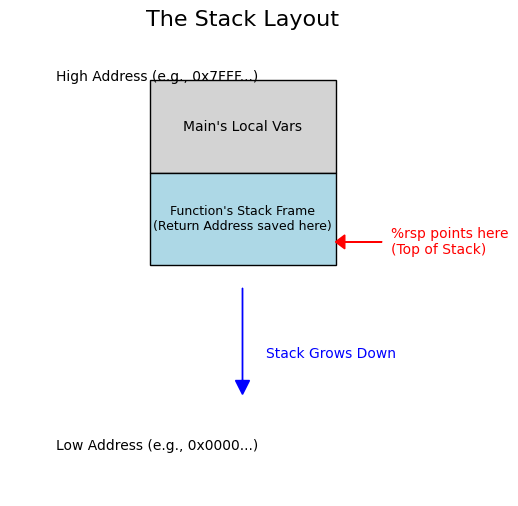

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# Draw memory addresses
ax.text(1, 9, "High Address (e.g., 0x7FFF...)", fontsize=10)
ax.text(1, 1, "Low Address (e.g., 0x0000...)", fontsize=10)

# Draw Stack Frame 1 (Main)
ax.add_patch(plt.Rectangle((3, 7), 4, 2, facecolor='lightgrey', edgecolor='black'))
ax.text(5, 8, "Main's Local Vars", ha='center', va='center')

# Draw Stack Frame 2 (Function)
ax.add_patch(plt.Rectangle((3, 5), 4, 2, facecolor='lightblue', edgecolor='black'))
ax.text(5, 6, "Function's Stack Frame\n(Return Address saved here)", ha='center', va='center', fontsize=9)

# RSP Pointer
ax.arrow(8, 5.5, -0.8, 0, head_width=0.3, head_length=0.2, color='red')
ax.text(8.2, 5.5, "%rsp points here\n(Top of Stack)", color='red', va='center')

# Growth Arrow
ax.arrow(5, 4.5, 0, -2, head_width=0.3, head_length=0.3, color='blue')
ax.text(5.5, 3, "Stack Grows Down", color='blue')

plt.title("The Stack Layout", fontsize=16)
plt.show()

### 4. The Calling Convention (The Rules of the Road)
This is the most important memorization task in the course. If you mix this up, functions won't find their data.

**Arguments (Inputs):**
Passed in registers in this specific order:
1.  `%rdi` (Argument 1)
2.  `%rsi` (Argument 2)
3.  `%rdx` (Argument 3)
4.  `%rcx` (Argument 4)
5.  `%r8`  (Argument 5)
6.  `%r9`  (Argument 6)
*(If you have more than 6 arguments, the rest go on the Stack).*

**Return Value (Output):**
*   `%rax`

**Register Protection (Who cleans up?):**
*   **Caller-Saved:** (`%rdi`, `%rsi`, `%rdx`, `%rcx`, `%r8`, `%r9`, `%rax`, `%r10`, `%r11`). If you call a function, **assume these registers will be trashed.** Save them if you need them.
*   **Callee-Saved:** (`%rbx`, `%rbp`, `%r12`-`%r15`). If you write a function, you **must** restore these to their original values before you return.

### 5. Key Instructions

1.  **`pushq %reg`**:
    *   `%rsp` = `%rsp` - 8
    *   Memory[`%rsp`] = value inside `%reg`
2.  **`popq %reg`**:
    *   value inside `%reg` = Memory[`%rsp`]
    *   `%rsp` = `%rsp` + 8
3.  **`callq Label`**:
    *   Push the address of the *next* instruction (the Return Address) onto the stack.
    *   Jump to `Label`.
4.  **`retq`**:
    *   Pop the Return Address off the stack.
    *   Jump to that address.

### 6. Worked Example: A Simple Function Call
**C Code:**
```c
long add(long a, long b) {
    return a + b;
}

void main() {
    long x = add(10, 20);
}
```

**Assembly Translation:**

**Part A: The Caller (main)**
```assembly
movq $10, %rdi      # Put first argument (10) in %rdi
movq $20, %rsi      # Put second argument (20) in %rsi
callq add           # 1. Push return address to stack
                    # 2. Jump to label 'add'
# ... (program resumes here after retq)
# Result is now in %rax
```

**Part B: The Callee (add)**
```assembly
add:
    movq %rdi, %rax # Move arg1 (10) to result register
    addq %rsi, %rax # Add arg2 (20) to result. %rax is now 30.
    retq            # 1. Pop return address
                    # 2. Jump back to caller
```

### 7. Practice Problems

**Problem 1 (Stack Mechanics):**
Assume `%rsp` starts at address `0x1000`.
You execute `pushq %rax`.
What is the new value of `%rsp`?

**Problem 2 (Argument Mapping):**
You want to call a function `calculate(a, b, c)`.
Which registers hold `a`, `b`, and `c`?

**Problem 3 (Callee-Saved):**
You are writing a function. You want to use register `%rbx` for temporary math, but `%rbx` is a "Callee-Saved" register.
What two steps must you take to follow the rules?

**Problem 4 (Analysis):**
Why does the stack grow *down* (subtracting from addresses) instead of up? (Think about the Memory Layout diagram from Chapter 1).

---

### 8. Hints
*   **Hint 1:** Registers are 64-bit. How many bytes is 64 bits? Subtract that from `0x1000`.
*   **Hint 2:** Recall the mnemonic "Di, Si, D, C, 8, 9" (Diane's Silk Dress Costs 89 dollars... or make up your own!).
*   **Hint 3:** Imagine borrowing your friend's car. You adjust the seat to drive. What must you do before giving it back?
*   **Hint 4:** The Heap grows *up*. If the Stack also grew *up*, they would collide immediately.

---

### 9. Intuitive Solutions

**Solution 1:**
*   64 bits = 8 bytes.
*   Pushing *decrements* the stack pointer.
*   `0x1000` - 8 = **0x0FF8**.

**Solution 2:**
*   Argument 1 (`a`) -> **`%rdi`**
*   Argument 2 (`b`) -> **`%rsi`**
*   Argument 3 (`c`) -> **`%rdx`**

**Solution 3:**
1.  **Push** `%rbx` onto the stack at the very start of your function (save the old value).
2.  **Pop** `%rbx` from the stack right before you `retq` (restore the old value).

**Solution 4:**
*   The **Heap** (dynamic memory) starts at the bottom and grows **UP**.
*   The **Stack** starts at the top and grows **DOWN**.
*   This maximizes the empty space in the middle for both to use without crashing into each other early.

---

### 10. Reference Summary (Cheat Sheet)

| Concept | Details |
| :--- | :--- |
| **Arguments 1-6** | `%rdi`, `%rsi`, `%rdx`, `%rcx`, `%r8`, `%r9` |
| **Return Value** | `%rax` |
| **Stack Pointer** | `%rsp` (Points to top element) |
| **Caller-Saved** | Registers the *caller* must save if they want to keep them (`rdi`, `rsi`, `rdx`, etc.) |
| **Callee-Saved** | Registers the *function* must restore if it touches them (`rbx`, `rbp`, `r12-r15`) |
| **Stack Alignment** | `%rsp` should be a multiple of 16 before a `call` (Standard ABI rule). |

### 11. Associated Problems (Course-Specific)

**HW 4 (Power) & Lab 5:**
In the Toy ISA, we simulated a stack.
*   **Toy ISA Push:** `rA = rA - 1; Mem[rA] = val` (Stack grows down, decrement first).
*   **x86 Push:** Exactly the same logic, but decrements by 8 (bytes) instead of 1.

**Recursion in Assembly:**
When a function calls itself (like in HW 4 `power(a, b)`):
1.  It must save its own arguments (like `a` or `b`) onto the stack if it needs them *after* the recursive call returns.
2.  This creates a chain of Stack Frames, one for every level of recursion.
3.  If you forget to pop, the stack grows until it hits the Heap (**Stack Overflow**).

# Chapter 6: C – The High-Level Assembler

We have spent weeks acting as the CPU, manually moving data between registers and memory. It was exhausting.

Now, we upgrade our tools. We aren't leaving the world of memory and pointers; we are just getting a better way to describe them. **C is not a "high-level" language like JavaScript.** It is a "portable assembly." Every line of C maps directly to the hardware concepts we just learned.

### 1. Intuition First
**The "Real Estate" Analogy**

In JavaScript, when you create a variable `let x = 10`, you don't care *where* it lives. It just floats in the cloud.

In C (and Systems), memory is **Real Estate**.
*   **Variable Declaration:** You are buying a plot of land.
    *   `char`: A tiny 1-byte shed.
    *   `int`: A standard 4-byte house.
    *   `long`: A massive 8-byte mansion.
*   **The Pointer:** The **Street Address** of that house (e.g., "123 Memory Lane").
*   **The Array:** A row of identical houses built right next to each other.

### 2. Formal Definition (Translated)
*   **Type:** In C, a "type" is just a **size** label. It tells the CPU how many bytes to grab.
    *   `char`: 1 byte.
    *   `int`: 4 bytes (usually).
    *   `long`: 8 bytes (x86-64 standard).
*   **Pointer (`*`):** A variable that stores a **memory address**. In x86-64, a pointer is *always* 8 bytes (because addresses are 64-bit), regardless of what it points to.
*   **Dereference (`*ptr`):** "Go to the address stored in `ptr` and get the data."
    *   *Assembly equivalent:* `movq (%rbx), %rax`.
*   **Address-Of (`&x`):** "Tell me the memory address where variable `x` lives."
    *   *Assembly equivalent:* `leaq`.

### 3. Visualizing Arrays vs. Pointers

Let's look at an array of integers in memory. Notice how they are packed tight.

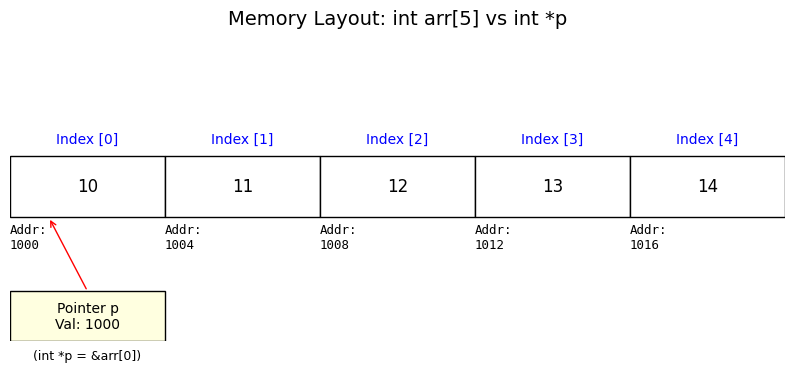

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(10, 4))
ax.set_xlim(0, 10)
ax.set_ylim(0, 5)
ax.axis('off')

# Draw memory strip
for i in range(5):
    # Draw box
    rect = patches.Rectangle((i*2, 2), 2, 1, facecolor='white', edgecolor='black')
    ax.add_patch(rect)
    
    # Label index
    ax.text(i*2 + 1, 3.2, f"Index [{i}]", ha='center', fontsize=10, color='blue')
    
    # Label Address (assuming int = 4 bytes)
    addr = 1000 + (i * 4)
    ax.text(i*2, 1.5, f"Addr:\n{addr}", ha='left', fontsize=9, family='monospace')
    
    # Value
    ax.text(i*2 + 1, 2.5, f"{10+i}", ha='center', va='center', fontsize=12)

# Draw Pointer p
rect_p = patches.Rectangle((0, 0), 2, 0.8, facecolor='lightyellow', edgecolor='black')
ax.add_patch(rect_p)
ax.text(1, 0.4, "Pointer p\nVal: 1000", ha='center', va='center', fontsize=10)
ax.text(1, -0.3, "(int *p = &arr[0])", ha='center', fontsize=9)

# Arrow
ax.annotate("", xy=(0.5, 2), xytext=(1, 0.8), arrowprops=dict(arrowstyle="->", color='red'))

plt.title("Memory Layout: int arr[5] vs int *p", fontsize=14)
plt.show()

### 4. Pointer Arithmetic (The Magic Scaling)
This is the #1 confusion for JS programmers.

If you have a pointer `p` pointing to address `1000`.
*   If `p` is a `char *` (size 1): `p + 1` = Address **1001**.
*   If `p` is an `int *` (size 4): `p + 1` = Address **1004**.
*   If `p` is a `long *` (size 8): `p + 1` = Address **1008**.

**The Rule:** `ptr + i` actually adds `i * sizeof(TYPE)` to the raw address.
C assumes if you add "1" to a pointer, you want the **next item**, not the next byte.

### 5. Worked Example: Array Access
**C Code:**
```c
int arr[5];   // arr starts at address 0x1000
arr[2] = 50;
```

**What really happens (The "Desugaring"):**
1.  `arr` is just a label for address `0x1000`.
2.  `arr[2]` means "Go to the starting address, skip 2 integers, and write there."
3.  Math: `Start + (Index * Size)`
    *   `0x1000 + (2 * 4)`
    *   `0x1000 + 8` = `0x1008`.
4.  **Assembly Equivalent:**
    `movl $50, 8(%rdi)`  *(Assuming %rdi holds 0x1000)*

### 6. Practice Problems

**Problem 1 (Types):**
If `sizeof(int) == 4` and `sizeof(long) == 8`:
How big is `int *`?
How big is `long *`?

**Problem 2 (Dereferencing):**
```c
long x = 10;
long *p = &x;
*p = 20;
```
What is the value of `x` now?

**Problem 3 (Pointer Arithmetic):**
`int *ptr` holds the address `0x200`.
What is the address of `ptr + 3`?

**Problem 4 (Strings):**
In C, a string is just a `char` array ending with a special **Null Terminator** (`\0` or value 0).
If you have the string "Hi", how many bytes of memory does it actually take up?

---

### 7. Hints
*   **Hint 1:** Remember, a pointer is just an address. On a 64-bit machine (x86-64), how big is *any* address?
*   **Hint 2:** `p` holds the address of `x`. `*p` means "go to the address in `p` (which is `x`) and write there".
*   **Hint 3:** `int` is 4 bytes. You are skipping 3 integers. How many bytes total did you skip?
*   **Hint 4:** Count the letters 'H', 'i', and don't forget the invisible terminator at the end that tells the computer the string is done.

---

### 8. Intuitive Solutions

**Solution 1:**
*   `int *` is **8 bytes**.
*   `long *` is **8 bytes**.
*   **Why?** They are both pointers (addresses). All addresses on a 64-bit machine are 8 bytes (64 bits). The *type* just tells the computer how to do arithmetic, not how big the pointer itself is.

**Solution 2:**
*   **20**.
*   `p` points to `x`. Changing `*p` is exactly the same as changing `x`. They refer to the same plot of land (memory address).

**Solution 3:**
*   Base address: `0x200`.
*   Skip: `3` items.
*   Size of item: `4` bytes (int).
*   Total bytes to add: `3 * 4 = 12`.
*   New address: `0x200 + 12` = **0x20C** (in Hex, 12 is C).

**Solution 4:**
*   'H' (1 byte)
*   'i' (1 byte)
*   '\0' (1 byte) -> *Required for C to know where the string ends!*
*   Total: **3 bytes**.

---

### 9. Reference Summary (Cheat Sheet)

| Concept | C Syntax | Description |
| :--- | :--- | :--- |
| **Address Of** | `&x` | Returns the memory address of variable `x`. |
| **Dereference** | `*p` | Access the value stored at the address `p`. |
| **Array Access** | `arr[i]` | Same as `*(arr + i)`. |
| **Pointer Math** | `p + i` | Adds `i * sizeof(type)` to the address. |
| **Null Terminator**| `\0` | The byte `0`. Marks the end of a C string. |
| **Sizeof** | `sizeof(T)` | Returns size in bytes (int=4, long=8, ptr=8). |

### 10. Associated Problems (Course-Specific)

**Lab 8 (Strings):**
You implemented `strlen` (string length).
*   **Logic:** Loop through the `char` array until you hit `\0`.
*   **Code:**
    ```c
    int len = 0;
    while (*str != '\0') { // While the character at current pointer isn't 0
        len++;
        str++; // Move pointer to next char (adds 1 byte)
    }
    ```

**HW 7 (Bits in C):**
You manipulated bits using C.
*   The logic (`<<`, `>>`, `&`, `|`) works exactly the same in C as in the "Tiny Computer" logic from Chapter 1.
*   C just gives you variables so you don't have to manage registers manually.

**Common Exam Question (Pointer vs Value):**
*   If you pass `int x` to a function, the function gets a **copy**. Changing it inside the function does nothing to the original.
*   If you pass `int *x` (a pointer) to a function, the function gets the **address**. It can follow that address to modify the original value. This is "Pass by Reference" logic implemented manually.

# Chapter 7: Memory Organization & The Heap

We have mastered the **Stack**: it's fast, organized, and automatic. But it has a fatal flaw: **Amnesia**.
When a function returns, its Stack Frame is destroyed. Any data stored there is gone forever.

If we want to create data that survives after a function returns (like a user profile, a game state, or a linked list), we need a new region of memory: **The Heap**.

### 1. Intuition First
**The Hotel vs. The Backpack**

*   **The Stack (Your Backpack):**
    *   You carry it with you.
    *   It's small.
    *   You put things in and take them out instantly.
    *   *Limitation:* If you leave the room, you take the backpack with you. You can't leave an item behind for someone else to use later.

*   **The Heap (A Hotel Room):**
    *   It's a massive building (User Memory).
    *   You have to check in at the front desk (`malloc`) to get a room key (Pointer).
    *   You can put whatever furniture (Data) you want in the room.
    *   **Crucial:** The room stays yours *forever* until you go back to the front desk and check out (`free`). If you lose the key without checking out, that room is locked forever (Memory Leak).

### 2. Formal Definition (Translated)
*   **The Heap:** A large pool of unstructured memory used for **dynamic allocation**. Unlike the Stack, variables here do not disappear when functions return.
*   **`malloc(size)`:** "Memory Allocate". Asks the system for `size` bytes. Returns a pointer to the first byte.
*   **`free(ptr)`:** Returns the memory at `ptr` back to the system.
*   **`void *`:** A "Generic Pointer". It points to an address, but C doesn't know what type of data is there yet. `malloc` returns `void *` because it doesn't care if you store integers or spaceships.
*   **`NULL`:** A pointer to address 0. It means "Point to nothing." It is used to indicate errors (like running out of memory).

### 3. Visualizing Memory: Stack vs. Heap
In x86-64 Linux (and most systems), they grow toward each other to maximize space.

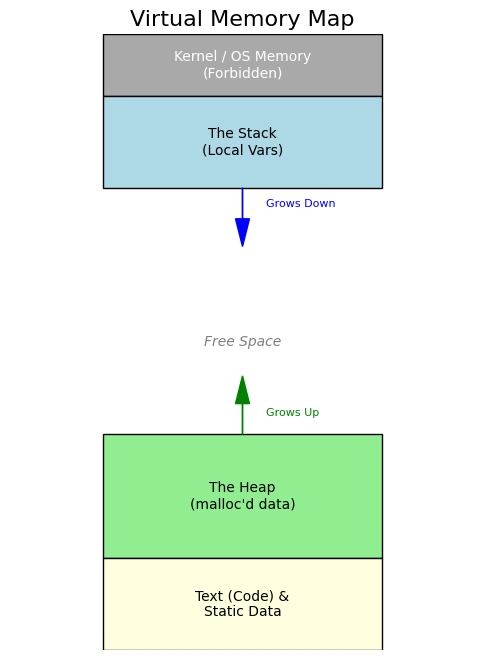

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(6, 8))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# Kernel Space (Top)
ax.add_patch(plt.Rectangle((2, 9), 6, 1, facecolor='darkgrey', edgecolor='black'))
ax.text(5, 9.5, "Kernel / OS Memory\n(Forbidden)", ha='center', va='center', color='white')

# Stack (Grows Down)
ax.add_patch(plt.Rectangle((2, 7.5), 6, 1.5, facecolor='lightblue', edgecolor='black'))
ax.text(5, 8.25, "The Stack\n(Local Vars)", ha='center', va='center')
ax.arrow(5, 7.5, 0, -0.5, head_width=0.3, color='blue')
ax.text(5.5, 7.2, "Grows Down", color='blue', fontsize=8)

# The Void (Free Space)
ax.text(5, 5, "Free Space", ha='center', va='center', color='grey', style='italic')

# Heap (Grows Up)
ax.add_patch(plt.Rectangle((2, 1.5), 6, 2, facecolor='lightgreen', edgecolor='black'))
ax.text(5, 2.5, "The Heap\n(malloc'd data)", ha='center', va='center')
ax.arrow(5, 3.5, 0, 0.5, head_width=0.3, color='green')
ax.text(5.5, 3.8, "Grows Up", color='green', fontsize=8)

# Code/Data (Bottom)
ax.add_patch(plt.Rectangle((2, 0), 6, 1.5, facecolor='lightyellow', edgecolor='black'))
ax.text(5, 0.75, "Text (Code) &\nStatic Data", ha='center', va='center')

plt.title("Virtual Memory Map", fontsize=16)
plt.show()

### 4. Structs & The Arrow Operator
The Heap is mostly used for **Structs** (complex objects).

**Defining a Struct:**
```c
struct Node {
    int value;
    struct Node *next;  // Pointer to the next node
};
```

**Accessing Fields:**
If you have a variable `struct Node n`, you use **dot notation**: `n.value`.
BUT, in the heap, we almost always have **pointers** to structs.
If you have `struct Node *p`:
1.  **The Hard Way:** `(*p).value` (Dereference first, then access field).
2.  **The Easy Way:** `p->value` (The Arrow Operator).

**Key Takeaway:** `p->field` is syntactic sugar for `(*p).field`.

### 5. Worked Example: Creating a Linked List Node
**Task:** Write a function that creates a new Node on the heap, sets its value, and returns it.

**C Code:**
```c
#include <stdlib.h> // Required for malloc/free

struct Node {
    int value;
    struct Node *next;
};

struct Node* createNode(int v) {
    // 1. Ask for memory (Size of one Node)
    // malloc returns void*, so we cast it to Node*
    struct Node* newNode = (struct Node*) malloc(sizeof(struct Node));

    // 2. Initialize the data
    newNode->value = v;   // Same as (*newNode).value = v
    newNode->next = NULL; // Safe default

    // 3. Return the pointer (The Room Key)
    return newNode; 
}
```

**Memory Analysis:**
*   `newNode` (the pointer variable itself) lives on the **Stack** inside `createNode`.
*   The actual `struct Node` it points to lives on the **Heap**.
*   When `createNode` returns, the `newNode` variable on the stack is destroyed, but the **value** it returned (the address) is passed to the caller. The house on the Heap stays standing.

### 6. Practice Problems

**Problem 1 (Allocation Size):**
You want to allocate an array of 10 integers on the heap. Write the `malloc` line.

**Problem 2 (Memory Leaks):**
Identify the bug in this code:
```c
void leaky() {
    int *x = malloc(sizeof(int));
    *x = 5;
    return; 
}
```

**Problem 3 (Use After Free):**
What happens here?
```c
int *x = malloc(sizeof(int));
free(x);
*x = 10;
```

**Problem 4 (Linked List Logic):**
You have a linked list: `Head -> Node A -> Node B -> NULL`.
You want to insert `Node C` between A and B.
What is the correct order of operations?
A) `A->next = C;` then `C->next = B;`
B) `C->next = B;` then `A->next = C;`

---

### 7. Hints
*   **Hint 1:** You need the size of *one* integer times 10.
*   **Hint 2:** `x` is a local variable (on the stack) holding a key to a room (on the heap). When the function ends, `x` is destroyed. What happens to the room?
*   **Hint 3:** You checked out of the hotel. Then you tried to go back into the room to put your suitcase down.
*   **Hint 4:** If you drop the rope connected to B before holding onto it with C, B floats away into space (Memory Leak).

---

### 8. Intuitive Solutions

**Solution 1:**
`int *arr = (int*) malloc(10 * sizeof(int));`

**Solution 2:**
**Memory Leak.** The function returns, destroying the pointer `x`. We have lost the address of the heap memory. We can never `free` it now. It occupies space until the program ends.
*Fix:* Call `free(x)` before returning, or return `x` so someone else can free it.

**Solution 3:**
**Use After Free (Undefined Behavior).** You told the OS "I am done with this memory." The OS might have given that address to someone else immediately. Writing 10 there might overwrite critical system data, crash the program, or do nothing. It is a severe bug.

**Solution 4:**
**Option B is correct.**
1.  `C->next = B;` (C grabs onto B).
2.  `A->next = C;` (A lets go of B and grabs C).
*If you did A, `A->next = C`, you just overwrote the only pointer to B. B is lost forever.*

---

### 9. Reference Summary (Cheat Sheet)

| Function/Symbol | Description | Example |
| :--- | :--- | :--- |
| `malloc(size)` | Allocates `size` bytes on Heap. Returns address. | `int *p = malloc(4);` |
| `free(ptr)` | Releases memory at `ptr`. | `free(p);` |
| `sizeof(type)` | Returns size of type in bytes. | `sizeof(int)` is 4. |
| `->` | Arrow Operator. Dereference + Field Access. | `p->val` means `(*p).val` |
| `NULL` | Pointer to 0. Means "Invalid" or "Empty". | `p = NULL;` |
| **Memory Leak** | Failing to `free` allocated memory. | |
| **Dangling Ptr** | A pointer pointing to memory that has been freed. | |

### 10. Associated Problems (Course-Specific)

**HW 8 (File System):**
You will implement a mock file system.
*   Directories contain lists of Files.
*   Since you don't know how many files a user will create, you **cannot** use arrays on the stack.
*   You must `malloc` a `struct Directory` and `struct File` for every new item.
*   **Crucial:** When you delete a file, you must `free` it to stop leaks.

**Lab 10 (Memory Errors):**
You will use a tool called **Valgrind** or **AddressSanitizer**.
*   These tools watch your program run.
*   If you forget to `free`, they yell "LEAK!".
*   If you write to `x` after `free(x)`, they yell "INVALID WRITE!".

# Chapter 8: Data Representation (Beyond Integers)

We’ve mastered integers (Chapter 1) and memory addresses (Chapters 6-7). But the world isn't just whole numbers. We need to represent decimals (`3.14`), text (`"Hello"`), and the ordering of bytes in memory.

In this chapter, we discover that **how** we store data is just as important as **what** we store.

### 1. Intuition First

**Part A: Floating Point (Scientific Notation in Binary)**
Imagine trying to write the number `0.000000005` on a small sticky note. You wouldn't write all those zeros. You'd write $5 \times 10^{-9}$.
*   **Sign:** Positive (+)
*   **Mantissa (The meat):** 5
*   **Exponent (The magnitude):** -9

Computers do exactly this, but in Binary. It's called **IEEE 754 Floating Point**.

**Part B: Endianness (The Egg Crackers)**
Gulliver's Travels featured a war between people who cracked eggs at the little end vs. the big end. Computers have a similar war about storing multi-byte numbers.
*   If you have the number `0x12345678` (4 bytes), and you want to store it in memory addresses 0, 1, 2, 3:
    *   **Big Endian:** Stores `12` `34` `56` `78` (Left-to-Right, like English text).
    *   **Little Endian:** Stores `78` `56` `34` `12` (Backwards!).

**Crucial Reality:** x86-64 (your laptop/server) is **Little Endian**. The Internet is **Big Endian**.

### 2. Formal Definition (Translated)

*   **IEEE 754:** The standard for floating-point arithmetic.
    *   **Sign Bit (s):** 1 bit. 0 = Positive, 1 = Negative.
    *   **Exponent (exp):** 8 bits (for `float`). Determines magnitude. Stored with a **Bias**.
    *   **Fraction/Mantissa (frac):** 23 bits (for `float`). The precision digits.
*   **Bias:** A number added to the actual exponent so we don't have to store negative numbers in the exponent field. For single precision `float`, Bias = 127.
*   **Endianness:** The order in which bytes of a multi-byte word are stored in memory.
    *   **Little Endian:** Least Significant Byte (LSB) at the Lowest Address.

### 3. Visualizing IEEE 754 (32-bit Float)

Most systems use this formula for "Normalized" numbers:
$$ Value = (-1)^s \times 1.Fraction \times 2^{(Exponent - Bias)} $$

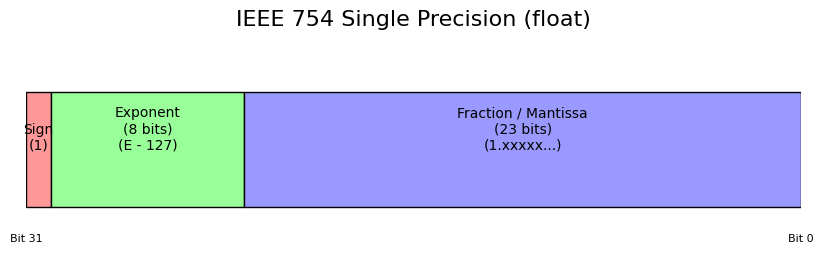

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(10, 3))
ax.set_xlim(0, 32)
ax.set_ylim(0, 2)
ax.axis('off')

# Draw bits
# Sign (1 bit)
ax.add_patch(patches.Rectangle((0, 0.5), 1, 1, facecolor='#FF9999', edgecolor='black'))
ax.text(0.5, 1.0, "Sign\n(1)", ha='center', fontsize=10)

# Exponent (8 bits)
ax.add_patch(patches.Rectangle((1, 0.5), 8, 1, facecolor='#99FF99', edgecolor='black'))
ax.text(5, 1.0, "Exponent\n(8 bits)\n(E - 127)", ha='center', fontsize=10)

# Fraction (23 bits)
ax.add_patch(patches.Rectangle((9, 0.5), 23, 1, facecolor='#9999FF', edgecolor='black'))
ax.text(20.5, 1.0, "Fraction / Mantissa\n(23 bits)\n(1.xxxxx...)", ha='center', fontsize=10)

# Labels
ax.text(0, 0.2, "Bit 31", ha='center', fontsize=8)
ax.text(32, 0.2, "Bit 0", ha='center', fontsize=8)

plt.title("IEEE 754 Single Precision (float)", fontsize=16)
plt.show()

### 4. Worked Example: Float Conversion

**Task:** Convert the decimal number `-12.5` to IEEE 754 Binary.

**Step 1: Sign**
Negative number -> Sign bit = **1**.

**Step 2: Binary Representation**
*   Integral part: `12` = `1100`
*   Decimal part: `0.5` = `1/2` = `2^-1`. In binary, that's `.1`.
*   Combined: `1100.1`

**Step 3: Normalize (Scientific Notation)**
Shift the decimal point until there is exactly one `1` to the left.
`1.1001` $\times 2^3$
(We moved the dot 3 spots left, so exponent is 3).

**Step 4: Exponent**
*   Actual Exponent = 3.
*   Bias = 127.
*   Stored Exponent = $3 + 127 = 130$.
*   130 in binary = `10000010`.

**Step 5: Fraction**
Drop the leading `1.` (it's implicit).
Keep `1001`. Pad with zeros to fill 23 bits.
`10010000000000000000000`

**Final Result:**
`1` | `10000010` | `10010000000000000000000`
Hex: `0xC1480000`

### 5. Worked Example: Endianness

**Task:** Store the 4-byte integer `0xAABBCCDD` at address `0x100` on a **Little Endian** machine.

*   **LSB (Little End):** `0xDD`
*   **MSB (Big End):** `0xAA`

**Little Endian Rule:** The *Little End* goes in the *Little Address*.

| Address | Value |
| :--- | :--- |
| `0x100` | `DD` |
| `0x101` | `CC` |
| `0x102` | `BB` |
| `0x103` | `AA` |

*(Note: If you dumped memory, it might look like `DD CC BB AA`, which looks "backwards" to English readers).*

### 6. Practice Problems

**Problem 1 (Float Logic):**
What is the decimal value of this float bits: `0 01111111 0000...0`?
*Hint: Sign=0, Exponent=127, Fraction=0.*

**Problem 2 (Endianness):**
You have an array of two short (2-byte) integers: `{0x1234, 0x5678}`.
The array starts at address `0x200`.
On a **Little Endian** machine, what is the byte at address `0x201`?
A) `0x12`
B) `0x34`
C) `0x56`
D) `0x78`

**Problem 3 (Strings):**
"Strings are byte arrays."
If you have `char *s = "ABC";`, how is it stored in memory? (ASCII 'A' is 0x41). Does Endianness matter for the string content?

---

### 7. Hints

*   **Hint 1:** Calculate the exponent first: `Stored - 127`. Then look at the implicit `1.Fraction`.
*   **Hint 2:** `short` is 2 bytes. The first number is `0x1234`. Little Endian puts the little end (`34`) at the lower address (`200`). Where does the big end (`12`) go?
*   **Hint 3:** A string is an array of 1-byte chunks. Endianness only affects multi-byte chunks (like `int` or `long`).

---

### 8. Intuitive Solutions

**Solution 1:**
*   Sign: 0 (Positive).
*   Exponent: 127. Actual Exponent = `127 - 127 = 0`.
*   Fraction: 0. Implicit mantissa = `1.0`.
*   Math: $+1 \times 1.0 \times 2^0 = 1 \times 1 = \mathbf{1.0}$.

**Solution 2:**
**A (0x12)**.
*   First short (`0x1234`) is at `0x200`.
*   Little End (`34`) at `0x200`.
*   Big End (`12`) at `0x201`.

**Solution 3:**
*   Memory: `0x41` ('A'), `0x42` ('B'), `0x43` ('C'), `0x00` (Null).
*   **Endianness does NOT apply** to the order of characters in a string, because each character is only 1 byte. 1-byte units have no "end" to flip. The order `A -> B -> C` is preserved.

---

### 9. Reference Summary (Cheat Sheet)

| Concept | Rule |
| :--- | :--- |
| **Float Value** | $(-1)^s \times 1.F \times 2^{E - Bias}$ |
| **Float Bias** | 127 (for 32-bit), 1023 (for 64-bit double). |
| **Special Floats** | Exp=Max, Frac=0 $\rightarrow \infty$. Exp=Max, Frac$\ne$0 $\rightarrow$ NaN. |
| **Little Endian** | Least Significant Byte at Lowest Address (x86 default). |
| **Big Endian** | Most Significant Byte at Lowest Address (Network default). |
| **Pointer Casting** | Casting `int*` to `char*` lets you see the endian bytes directly. |

### 10. Associated Problems (Course-Specific)

**Lab 11 (Floating Point):**
You might be asked to decode binary strings into float values.
*   Always extract the fields first: **S** (1 bit), **E** (8 bits), **F** (23 bits).
*   Don't forget the **Implicit 1**: The math is `1.F`, not `0.F` (unless Denormalized, Exp=0).

**HW (Endianness):**
If a question asks: "What happens if you cast an `int` pointer to a `char` pointer and print the first byte?"
*   `int x = 1` (which is `0x00000001`).
*   Little Endian: Bytes are `01 00 00 00`. The first byte is `1`.
*   Big Endian: Bytes are `00 00 00 01`. The first byte is `0`.
*   This is a classic test to detect the machine's architecture in C code!

# Chapter 9: Talking to the World (System I/O)

Our Tiny Computer is now powerful. It calculates, it manages memory, and it understands data types. But it is **trapped in a black box**. It has no way to see the keyboard or show things on the screen.

In JavaScript, you type `console.log("Hello")` and it just works. You don't care *how* the letters get to the screen. In Systems, we care deeply. We are crossing the border between your program and the **Operating System**.

### 1. Intuition First
**The Drive-Thru Window (User vs. Kernel)**

Imagine your program is a customer in a restaurant (User Space).
The Kitchen (Hardware/Hard Drive/Screen) has all the dangerous tools (knives, ovens).
*   **Rule:** Customers are **forbidden** from entering the kitchen. You cannot touch the hard drive directly. You might break it!
*   **The Solution:** You go to the counter (The System Call Interface) and ask the clerk (The Kernel) to do it for you.
    *   "Please write 'Hi' to the screen."
    *   "Please read 10 bytes from this file."

**The ID Number (File Descriptor)**
The Kernel doesn't give you the actual file object. It gives you a **Ticket Number** (File Descriptor).
*   "Here is Ticket #3. Whenever you want to write to 'my_essay.txt', just shout 'Ticket #3!' and give me the data."

### 2. Formal Definition (Translated)
*   **Kernel:** The core of the Operating System. It controls the hardware. It is the only thing allowed to perform I/O (Input/Output).
*   **System Call (Syscall):** A special instruction that pauses your program and jumps to the Kernel to request a service (like reading a file).
*   **File Descriptor (FD):** A simple integer (`int`) used to identify an open file, socket, or pipe.
    *   **0:** Standard Input (stdin) - Keyboard.
    *   **1:** Standard Output (stdout) - Screen.
    *   **2:** Standard Error (stderr) - Screen (for errors).
*   **Buffer:** A temporary holding area for data. Writing to the hardware byte-by-byte is slow (like buying one grain of rice at a time). We wait until we have a "buffer-full" of data, then send it all at once.

### 3. Visualizing the I/O Path

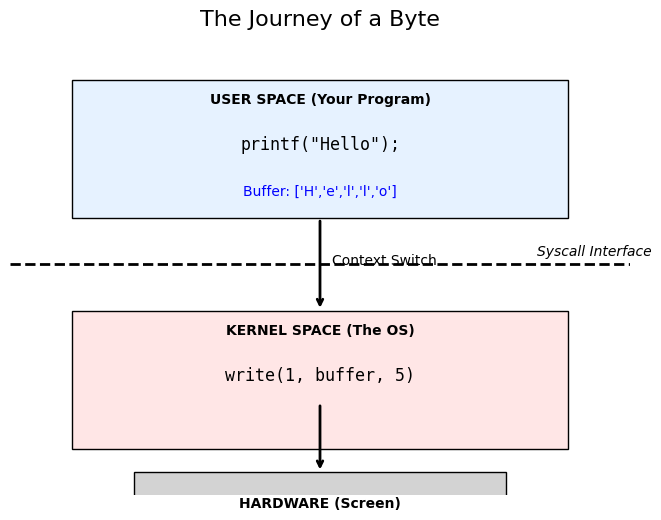

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# User Space
ax.add_patch(patches.Rectangle((1, 6), 8, 3, facecolor='#e6f2ff', edgecolor='black'))
ax.text(5, 8.5, "USER SPACE (Your Program)", ha='center', weight='bold')
ax.text(5, 7.5, "printf(\"Hello\");", ha='center', family='monospace', fontsize=12)
ax.text(5, 6.5, "Buffer: ['H','e','l','l','o']", ha='center', fontsize=10, color='blue')

# The Boundary
ax.plot([0, 10], [5, 5], 'k--', lw=2)
ax.text(8.5, 5.2, "Syscall Interface", fontsize=10, style='italic')

# Kernel Space
ax.add_patch(patches.Rectangle((1, 1), 8, 3, facecolor='#ffe6e6', edgecolor='black'))
ax.text(5, 3.5, "KERNEL SPACE (The OS)", ha='center', weight='bold')
ax.text(5, 2.5, "write(1, buffer, 5)", ha='center', family='monospace', fontsize=12)

# Hardware
ax.add_patch(patches.Rectangle((2, -1), 6, 1.5, facecolor='lightgrey', edgecolor='black'))
ax.text(5, -0.25, "HARDWARE (Screen)", ha='center', weight='bold')

# Arrows
ax.annotate("", xy=(5, 4), xytext=(5, 6), arrowprops=dict(arrowstyle="->", lw=2))
ax.text(5.2, 5, "Context Switch", ha='left')
ax.annotate("", xy=(5, 0.5), xytext=(5, 2), arrowprops=dict(arrowstyle="->", lw=2))

plt.title("The Journey of a Byte", fontsize=16)
plt.show()

### 4. Key Functions (The Low-Level API)

These functions are defined in `<unistd.h>`. They are **not** part of the C standard language; they are part of **Unix/Linux**.

1.  **`ssize_t write(int fd, const void *buf, size_t count)`**
    *   "Write `count` bytes from `buf` to file descriptor `fd`."
    *   Returns number of bytes written (or -1 on error).
2.  **`ssize_t read(int fd, void *buf, size_t count)`**
    *   "Read up to `count` bytes from `fd` and put them into `buf`."
    *   Returns number of bytes read (0 means End of File).
3.  **`open` / `close`**: Get a file descriptor or release it.

**VS High-Level (`stdio.h`):**
*   `printf` / `scanf` / `fopen`: These are C library wrappers. They use a **buffer** to group small writes together before calling `write`. This makes them faster for small data but less direct.

### 5. Worked Example: Using `read`
**Task:** Read 10 bytes from the user (keyboard) and print them back.

**C Code:**
```c
#include <unistd.h> // for read, write

int main() {
    char buffer[10]; // 1. Allocate space on the stack

    // 2. Read from FD 0 (Standard Input)
    // We ask for 10 bytes. The program PAUSES here until you type.
    ssize_t bytes_read = read(0, buffer, 10); 

    // 3. Write to FD 1 (Standard Output)
    // We only write exactly how many bytes we actually read.
    if (bytes_read > 0) {
        write(1, buffer, bytes_read);
    }
    
    return 0;
}
```

### 6. Practice Problems

**Problem 1 (File Descriptors):**
You open a file `data.txt`. The OS gives you File Descriptor (FD) `3`.
You immediately open `log.txt`. What FD will the OS likely give you?

**Problem 2 (Buffering):**
You write a program:
```c
printf("Hello");
while(1); // Infinite loop
```
The program runs forever, but "Hello" never appears on the screen. Why?

**Problem 3 (Return Values):**
You call `read(fd, buffer, 100)`.
It returns `0`. What does this mean?

**Problem 4 (Sockets - Conceptual):**
A Network Socket is just a File Descriptor used for the internet.
If you `write(socket_fd, "Hello", 5)`, where does the data go?

---

### 7. Hints
*   **Hint 1:** The OS typically uses the lowest available integer. 0, 1, and 2 are taken by default.
*   **Hint 2:** `printf` puts data in a holding tank (buffer). It doesn't flush the toilet (send to screen) until the tank is full or it sees a specific character. What character is a "line break"?
*   **Hint 3:** If you are reading a book and there are no more pages, what have you reached?
*   **Hint 4:** Files write to disk. Sockets write to the network card. But to your code, do they look different?

---

### 8. Intuitive Solutions

**Solution 1:**
**FD 4.**
FD 0, 1, 2 are stdin/out/err. FD 3 is `data.txt`. The next lowest number is 4.

**Solution 2:**
**The buffer wasn't flushed.**
`printf` stores "Hello" in a temporary array. It waits for a newline (`\n`) to actually call the expensive `write` syscall. Since you entered an infinite loop before printing `\n`, the data sits in the buffer forever.
*Fix:* `printf("Hello\n");`

**Solution 3:**
**End of File (EOF).**
The file is closed or finished. There is no more data to read.

**Solution 4:**
It goes to the **Network Card (NIC)**, then out over the WiFi/Ethernet cable to another computer. To your C program, however, it looks exactly like writing to a file. This is the beauty of **"Everything is a File"** in Unix.

---

### 9. Reference Summary (Cheat Sheet)

| Function | Meaning | Key Notes |
| :--- | :--- | :--- |
| **FD 0** | Stdin (Keyboard) | Read-only usually. |
| **FD 1** | Stdout (Screen) | Buffered (usually waits for `\n`). |
| **FD 2** | Stderr (Screen) | Unbuffered (prints immediately). |
| **`read(fd, buf, n)`** | Read `n` bytes from `fd` into `buf`. | Returns # bytes read. 0 = EOF. |
| **`write(fd, buf, n)`** | Write `n` bytes from `buf` to `fd`. | Returns # bytes written. |
| **Syscall** | Software Interrupt | Switches CPU to Kernel Mode. |
| **Context Switch** | CPU Logic | Saving current program state to run the OS. Expensive! |

### 10. Associated Problems (Course-Specific)

**Lab 9 (File Chat):**
You used `fopen`, `fread`, `fwrite`.
*   These are **High Level**. They deal with `FILE *` pointers, not integer FDs.
*   They handle buffering for you.

**HW 10 (Socket Chat):**
You used `socket`, `connect`, `read`, `write`.
*   This is **Low Level**. You dealt with integer FDs.
*   **Crucial:** Network data arrives in chunks. `read(fd, buf, 100)` might only return 10 bytes if only 10 bytes have arrived so far. You must write a **Loop** to keep reading until you get everything you need.

**HW 6 (Enigma):**
*   This HW used **Signals** (another form of I/O). When you messed up, the program "crashed" or handled a signal. Signals are how the OS interrupts your process to say "Stop that!" (e.g., Segfault).

# Chapter 10: Security & Optimization

We have built a fully functioning computer. It calculates (ALU), remembers (Memory), follows orders (Assembly), and talks to the outside world (I/O).

Now, we face two final questions:
1.  **How do we break it?** (Security)
2.  **How do we make it go fast?** (Optimization)

It turns out, the way we organized memory in Chapter 5 (The Stack) creates a massive security flaw. And the way we execute instructions in Chapter 3 (Fetch-Decode-Execute) is too slow for modern needs.

### 1. Intuition First

**Part A: The Stack Smashing Analogy**
Imagine our Chef (CPU) is following a recipe (Function) written on a card.
*   The Chef puts the card on a stack of plates (The Stack).
*   Beneath the card is a sticky note saying: **"When done, return to table 4."** (Return Address).
*   The Chef starts writing a shopping list on the card.
*   **The Flaw:** The Chef writes *too much*. They write off the edge of the card, onto the sticky note underneath.
*   **The Hack:** A malicious customer sneaks in and changes the sticky note to say: **"When done, give all money to the customer."**
*   The Chef finishes, reads the corrupted note, and unknowingly executes the hack.

**Part B: The Assembly Line Analogy (Pipelining)**
Imagine a laundry service.
1.  Wash (30 mins)
2.  Dry (30 mins)
3.  Fold (30 mins)
*   **Sequential:** Wash Load A, then Dry A, then Fold A. Total: 90 mins per load.
*   **Pipelined:** Wash A. While A is Drying, Wash B. While A is Folding and B is Drying, Wash C.
*   **Result:** You still take 90 mins per load, but a *new* load finishes every 30 minutes. Throughput increases!

### 2. Formal Definition (Translated)

*   **Buffer Overflow:** Writing more data into a memory buffer (array) than it can hold.
*   **Stack Smashing:** A specific type of buffer overflow where a user overwrites the **Return Address** on the stack. When the function returns, it jumps to malicious code instead of the original caller.
*   **Segfault (Segmentation Fault):** The hardware yelling "Stop!" The CPU tried to access a memory address that doesn't exist or is forbidden (often caused by corrupting pointers via overflow).
*   **Cache:** A tiny, ultra-fast memory bank right next to the CPU. It holds copies of data we used recently.
    *   *Locality:* If you read `array[i]`, you will likely read `array[i+1]` soon. The cache grabs the whole block.
*   **Pipelining:** Breaking the "Fetch-Decode-Execute" cycle into stages so multiple instructions can be processed at the same time.

### 3. Visualizing Stack Smashing

Recall from Chapter 5 that the stack grows **DOWN**.

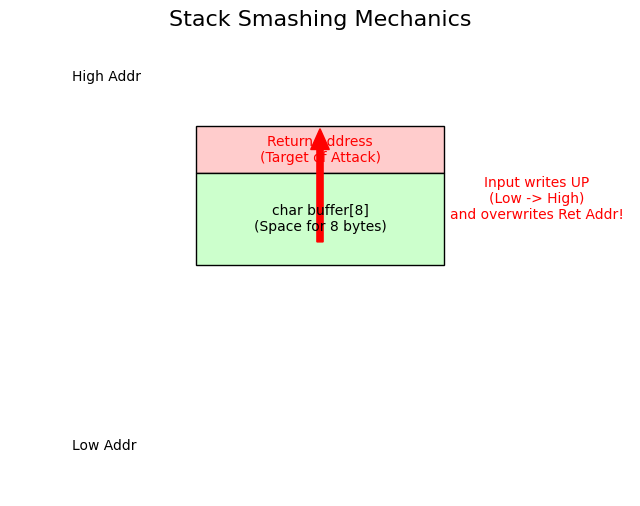

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# Stack Addresses
ax.text(1, 9, "High Addr", fontsize=10)
ax.text(1, 1, "Low Addr", fontsize=10)

# 1. Return Address (The Target)
ax.add_patch(patches.Rectangle((3, 7), 4, 1, facecolor='#ffcccc', edgecolor='black'))
ax.text(5, 7.5, "Return Address\n(Target of Attack)", ha='center', va='center', color='red')

# 2. Local Variable (The Buffer)
ax.add_patch(patches.Rectangle((3, 5), 4, 2, facecolor='#ccffcc', edgecolor='black'))
ax.text(5, 6, "char buffer[8]\n(Space for 8 bytes)", ha='center', va='center')

# 3. The Overflow
ax.arrow(5, 5.5, 0, 2.0, head_width=0.3, color='red', width=0.1)
ax.text(8.5, 6, "Input writes UP\n(Low -> High)\nand overwrites Ret Addr!", color='red', ha='center')

plt.title("Stack Smashing Mechanics", fontsize=16)
plt.show()

### 4. Vulnerable Code Example
This C code is dangerous. It uses `gets`, which does not check size.

```c
void vulnerable() {
    char buffer[10];  // Room for 10 chars
    gets(buffer);     // DANGER: User can type 100 chars!
    // If user types 100 chars:
    // 1. Fills 'buffer'
    // 2. Overwrites saved registers
    // 3. Overwrites Return Address
}
```

**The Fix:** Always use functions that check length, like `fgets` or `strncpy`.

### 5. Optimization: The Memory Hierarchy
Computers are fast, but memory is slow. We use layers to hide the slowness.

1.  **Registers:** Instant (0 cycles).
2.  **L1 Cache:** Very fast (4 cycles). Tiny (32KB).
3.  **L2/L3 Cache:** Fast (10-40 cycles). Bigger (MBs).
4.  **RAM (Main Memory):** Slow (100+ cycles). Huge (GBs).
5.  **Disk (SSD/HDD):** Glacial (Millions of cycles). Enormous (TBs).

**Key Takeaway:**
*   **Spatial Locality:** If you access `x`, you will likely access `x+1`. (Arrays are fast!).
*   **Temporal Locality:** If you access `x`, you will likely access `x` again soon. (Loops are fast!).

### 6. Practice Problems

**Problem 1 (Security):**
You have a buffer `char buf[4]` on the stack. The Return Address is located 8 bytes above `buf`.
If you write 12 bytes of 'A's (`0x41`) into `buf`, what will the Return Address become?

**Problem 2 (Pipelining):**
Your CPU has a 5-stage pipeline: Fetch, Decode, Execute, Memory, Writeback. Each stage takes 1 nanosecond (ns).
*   **Latency:** How long does ONE instruction take to finish?
*   **Throughput:** In a perfect world, how often does an instruction finish?

**Problem 3 (Caching):**
Which code snippet is faster? Why?
*Snippet A:*
```c
for (int i = 0; i < 10000; i++)
    for (int j = 0; j < 10000; j++)
        sum += array[i][j]; // Access rows sequentially
```
*Snippet B:*
```c
for (int j = 0; j < 10000; j++)
    for (int i = 0; i < 10000; i++)
        sum += array[i][j]; // Access columns sequentially
```

**Problem 4 (Memory Bugs):**
Why does accessing `array[1000000]` typically cause a **Segmentation Fault**?

---

### 7. Hints
*   **Hint 1:** Draw the stack. `buf` is at the bottom. Write 'A's upwards. You fill 4 bytes of `buf`, then 4 bytes of padding/saved registers, then... what hits the Return Address?
*   **Hint 2:** Latency is the total time for one item. Throughput is the rate of completion (like the laundry example).
*   **Hint 3:** C stores arrays in **Row-Major Order** (row by row). The cache likes it when you read neighbors.
*   **Hint 4:** Does your program "own" the memory at address 1,000,000? What table does the OS check?

---

### 8. Intuitive Solutions

**Solution 1:**
The Return Address becomes **`0x41414141`**.
*   Bytes 0-3 fill `buf`.
*   Bytes 4-7 fill the gap.
*   Bytes 8-11 overwrite the Return Address with 'A' (`0x41`). The program will try to jump to address `0x41414141` and likely crash (Segfault).

**Solution 2:**
*   **Latency:** 5 stages * 1 ns = **5 ns**.
*   **Throughput:** Once the pipeline is full, one instruction finishes every **1 ns**. (5x speedup!).

**Solution 3:**
**Snippet A is Faster.**
*   C stores arrays row-by-row.
*   Snippet A reads `[0][0]`, `[0][1]`, `[0][2]`. These are neighbors in memory. The cache grabs the whole block, so most reads are instant (Cache Hits).
*   Snippet B reads `[0][0]`, `[1][0]`, `[2][0]`. These are far apart. Every read misses the cache and goes to slow RAM.

**Solution 4:**
**Segmentation Fault.**
The OS maintains a "Page Table" of valid memory for your process. Index 1,000,000 is likely outside the valid region (or belongs to the Kernel). The hardware checks the table, sees "Invalid," and triggers an exception (Segfault).

---

### 9. Associated Problems (Course-Specific)

**Enigma HW (Buffer Overflow):**
You likely had to input a "password" that was longer than the buffer allowed.
*   The extra characters overwrote a variable (like `is_admin = 0` to `1`).
*   Or they overwrote the Return Address to jump to the "Success" function directly.

***

# Reference Summary (Cheat Sheet)

### **Unit 1: Data Representation**
*   **Bit / Byte:** 0/1. Byte = 8 bits.
*   **Hex:** `0x` prefix. Each digit = 4 bits (`0xF` = `1111`).
*   **Two's Complement:** `~x + 1` to negate. MSB is sign bit (1=neg).
*   **Endianness:**
    *   **Little Endian:** LSB at lowest address (x86). `0x1234` $\to$ `34 12`.
    *   **Big Endian:** MSB at lowest address (Network). `0x1234` $\to$ `12 34`.
*   **IEEE 754 Float:** `(-1)^s * 1.F * 2^(E-Bias)`. Bias=127.

### **Unit 2: Logic & Architecture**
*   **Logic Gates:** `&` (AND), `|` (OR), `^` (XOR), `~` (NOT).
*   **Mux:** Hardware `if/else`. Selects input based on control wire.
*   **ALU:** Arithmetic Logic Unit. Does the math.
*   **PC:** Program Counter. Address of *current* instruction.
*   **Fetch-Decode-Execute:** The cycle the CPU runs forever.

### **Unit 3: Assembly (x86-64 AT&T)**
*   **Order:** `Op Source, Dest` (e.g., `movq $5, %rax`).
*   **Registers:** `%rax` (Return), `%rdi` (Arg1), `%rsi` (Arg2), `%rsp` (Stack Ptr).
*   **Addressing:** `D(B, I, S)` $\to$ `Mem[Base + Index*Scale + Disp]`.
*   **Lea:** Load Effective Address. Math, not memory access. `leaq (%rax, %rax, 2), %rax` $\to$ `x*3`.

### **Unit 4: The Stack & Procedures**
*   **Growth:** Grows **DOWN** (subtracts from `%rsp`).
*   **Push:** `sub 8, %rsp`; `mov val, (%rsp)`.
*   **Pop:** `mov (%rsp), val`; `add 8, %rsp`.
*   **Call:** Push return address; Jump.
*   **Ret:** Pop return address; Jump.
*   **Caller-Saved:** Saved by caller (temporary registers).
*   **Callee-Saved:** Saved by function (must preserve `%rbx` etc.).

### **Unit 5: C Memory**
*   **Pointer (`*p`):** Variable storing an address. Size = 8 bytes.
*   **Dereference (`*p`):** Go to that address.
*   **Address-Of (`&x`):** Get the address.
*   **Array:** Block of memory. `arr[i]` $\equiv$ `*(arr + i)`.
*   **String:** Char array ending in `\0` (Null).

### **Unit 6: The Heap**
*   **`malloc(n)`:** Allocate `n` bytes. Returns pointer.
*   **`free(p)`:** Release memory.
*   **Leak:** Forgetting to free.
*   **Dangling Pointer:** Using after free.

### **Unit 7: I/O & System Calls**
*   **Kernel:** Controls hardware.
*   **Syscall:** Asking kernel for help.
*   **File Descriptor:** Integer ID (0=Stdin, 1=Stdout, 2=Stderr).
*   **`read`/`write`:** Raw byte transfer. No buffering.
*   **Buffered I/O:** `printf`, `fopen`. Faster for small writes.

### **Unit 8: Security**
*   **Buffer Overflow:** Writing past array bounds.
*   **Stack Smashing:** Overwriting return address to hijack control flow.
*   **Canary:** Random value on stack to detect overflows.

### **Unit 9: Optimization**
*   **Cache:** Fast memory.
*   **Spatial Locality:** Accessing neighbors (arrays). Good for cache.
*   **Temporal Locality:** Accessing same item often (loops). Good for cache.
*   **Pipelining:** Overlapping instructions to increase throughput.

# Part 1: The Cumulative Study Guide
*Everything you need to know, organized by the "Tiny Computer" narrative.*

### Unit 1: The Raw Materials (Data Representation)
*   **Integers:**
    *   **Unsigned:** Standard binary. Range $0$ to $2^n - 1$.
    *   **Two's Complement (Signed):** MSB is the sign bit. To negate: **Flip bits + 1**.
    *   **Range:** $-2^{n-1}$ to $2^{n-1} - 1$.
    *   **Hex:** 1 Hex digit = 4 bits (Nibble). `0xF` = `1111`.
*   **Floating Point (IEEE 754):**
    *   Formula: $(-1)^s \times 1.Fraction \times 2^{Exp - Bias}$.
    *   **Bias:** 127 (for 32-bit floats).
    *   **Normalization:** We always shift the binary point so there is one `1` to the left (e.g., `1.011...`). We don't store that leading 1.
*   **Endianness:**
    *   **Little Endian (x86):** Least Significant Byte at the *Lowest* Address. (Looks backwards in a hex dump).
    *   **Big Endian (Network):** Most Significant Byte at the *Lowest* Address. (Looks normal).

### Unit 2: The Hardware (Logic & Circuits)
*   **Gates:**
    *   **AND (`&`):** Both must be 1.
    *   **OR (`|`):** Either can be 1.
    *   **XOR (`^`):** Inputs must be different.
    *   **NOT (`~`):** Flip 0 $\to$ 1.
*   **Mux (Multiplexer):** The hardware `if/else`. A selector wire chooses which input flows to the output.
*   **Registers:** Hardware variables. They store state between clock cycles.

### Unit 3: Speaking to the Machine (Assembly x86-64)
*   **Syntax (AT&T):** `Instruction Source, Destination`.
*   **Registers:** `%rax` (Return), `%rsp` (Stack Pointer).
*   **Accessing Memory:** `D(Base, Index, Scale)` $\to$ Address = `Base + Index*Scale + D`.
*   **`mov` vs `lea`:**
    *   `mov`: Goes to memory and gets data.
    *   `lea`: Does math on the address but **never** touches memory. Used for pointer math and fast arithmetic.

### Unit 4: Procedures & The Stack
*   **The Stack:** Grows **DOWN** (subtracts from `%rsp`).
*   **Calling Convention:**
    *   **Args:** `%rdi`, `%rsi`, `%rdx`, `%rcx`, `%r8`, `%r9`. (Diane's Silk Dress Costs 89 Dollars).
    *   **Return:** `%rax`.
    *   **Caller-Saved:** Save these if you care about them before calling someone else.
    *   **Callee-Saved:** (`%rbx`, `%rbp`, `%r12-15`). If you use these, put them back exactly how you found them.
*   **Instructions:**
    *   `call Label`: Push Return Address, Jump.
    *   `ret`: Pop Return Address, Jump.

### Unit 5: C Programming & Memory
*   **Pointers:** Variables that store addresses. On x86-64, **all pointers are 8 bytes.**
*   **Pointer Arithmetic:** `ptr + 1` adds `1 * sizeof(type)` to the address.
*   **Arrays:** `arr[i]` is identical to `*(arr + i)`.
*   **Strings:** `char` arrays ending in `\0` (Null Terminator).
*   **Heap vs. Stack:**
    *   **Stack:** fast, automatic, local variables. Gone when function returns.
    *   **Heap:** manual (`malloc`/`free`), persistent, slower. User responsibility.
*   **Structs:** `p->field` is the same as `(*p).field`.

### Unit 6: I/O & Systems
*   **File Descriptors:** Integers representing open files. 0 (Stdin), 1 (Stdout), 2 (Stderr).
*   **Syscalls:** `read`, `write`. Unbuffered. Direct kernel access.
*   **Standard Lib:** `printf`, `fopen`. Buffered (saves data until newline or full). Safer/Easier.

---
---

# The One-Page Cheat Sheet

*Copy this onto a physical sheet of paper. It covers 90% of exam mechanics.*

### **DATA REPRESENTATION**
| Concept | Rule / Formula |
| :--- | :--- |
| **Hex** | `0-9`, `A=10`, `B=11`, `C=12`, `D=13`, `E=14`, `F=15` |
| **2's Comp** | To Negate: **Flip bits + 1**. (e.g., `0001` $\to$ `1110` + 1 = `1111` = -1) |
| **Signed** | MSB is sign. `1` = negative. |
| **Float** | Val = $(-1)^s \times 1.Frac \times 2^{Exp - 127}$ |
| **Endian** | **Little:** LSB at Low Addr (x86). **Big:** MSB at Low Addr. |

### **BITWISE LOGIC**
*   `&` (AND): 1 if both 1. (Masking)
*   `|` (OR): 1 if either 1. (Setting)
*   `^` (XOR): 1 if diff. (Toggling)
*   `~` (NOT): Flip all.
*   `<< n`: Multiply by $2^n$.
*   `>> n`: Divide by $2^n$.

### **X86-64 ASSEMBLY (AT&T)**
**Syntax:** `Op Src, Dest`
**Suffixes:** `b` (1 byte), `w` (2), `l` (4), `q` (8).

| Instruction | Action | Note |
| :--- | :--- | :--- |
| `movq S, D` | `D = S` | Copies data. |
| `leaq S, D` | `D = &S` | **Math only.** No memory access. |
| `addq S, D` | `D = D + S` | |
| `subq S, D` | `D = D - S` | |
| `cmp S1, S2` | `S2 - S1` | Sets flags. Discards result. |
| `test S1, S2`| `S1 & S2` | Sets flags. Discards result. |
| `jmp`, `je`... | `PC = Addr` | Unconditional / Conditional Jump. |
| `pushq S` | `%rsp-=8; *%rsp=S` | Grow stack, save value. |
| `popq D` | `D=*rsp; %rsp+=8` | Retrieve value, shrink stack. |

**Memory Addressing:** `Disp(Base, Index, Scale)`
$$ \text{Addr} = \text{Base} + (\text{Index} \times \text{Scale}) + \text{Disp} $$
*Scale can only be 1, 2, 4, or 8.*

### **CALLING CONVENTION**
**Args:** `%rdi`, `%rsi`, `%rdx`, `%rcx`, `%r8`, `%r9`.
**Return:** `%rax`.
**Stack Ptr:** `%rsp` (Points to top).
**Caller-Saved:** `rdi`, `rsi`, `rdx`, `rcx`, `r8`, `r9`, `rax`.
**Callee-Saved:** `rbx`, `rbp`, `r12` - `r15`. (Must save/restore if used).

### **C PROGRAMMING & MEMORY**
*   **Pointer:** `int *p`. Stores an address. Size = 8 bytes.
*   **Dereference:** `*p`. "Go to address p".
*   **Address Of:** `&x`. "Get address of x".
*   **Arithmetic:** `ptr + i` $\to$ adds `i * sizeof(type)` bytes.
*   **Struct Access:** `(*p).field` is same as `p->field`.
*   **Malloc:** `void *p = malloc(bytes)`. Allocates on **Heap**.
*   **Free:** `free(p)`. Returns memory to system.
*   **Stack:** Local variables. Auto-managed.
*   **Heap:** Dynamic variables. Manually managed.

### **SYSTEM I/O**
*   **0:** Stdin. **1:** Stdout. **2:** Stderr.
*   **`ssize_t read(int fd, void *buf, size_t count)`**
    *   Returns # bytes read. 0 = EOF. -1 = Error.
*   **`ssize_t write(int fd, void *buf, size_t count)`**
    *   Returns # bytes written.
*   **Buffered:** `printf` (User Space). Fast.
*   **Unbuffered:** `write` (Kernel Space/Syscall). Expensive.

### **SECURITY**
*   **Buffer Overflow:** Writing past array end.
*   **Stack Smashing:** Overwriting Return Addr on stack.
*   **Segfault:** Accessing memory you don't own.